<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">SWDB 2023 - Day 5 Workshop 1: What gives rise to neural variability and dynamics?</h1> 
<h3 align="center">Friday, August 25th, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> What could models of neural variability and dynamics tell us about the brain? </h2>
<ul>
<li> How does stimulus influence neuronal responses and variability? 
<li> How does stimulus interact with time course of the trial?
<li> How does neural activity depend on its past response?
<li> How do population of neurons interact over time to shape neural dynamics?
</ul>

### Imports

In [410]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # Useful tool to arrange multiple plots in one figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html)
%matplotlib inline

import platform

import allensdk
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

## Load Data
### We will be working with the Allen institute's Visual Coding Neuropixel dataset from earlier in the week

In [411]:
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2023/"

In [412]:
# Code Ocean
data_path = Path(data_root) / 'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json'
cache = EcephysProjectCache.from_warehouse(manifest=data_path)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


The dataset consists of two subsets. We'll specifically be looking at the Brain Observatory subset

In [413]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
brain_observatory_type_sessions.tail()

published_at  specimen_id           session_type  \
id                                                                    
773418906  2019-10-03T00:00:00Z    757329624  brain_observatory_1.1   
791319847  2019-10-03T00:00:00Z    769360779  brain_observatory_1.1   
797828357  2019-10-03T00:00:00Z    776061251  brain_observatory_1.1   
798911424  2019-10-03T00:00:00Z    775876828  brain_observatory_1.1   
799864342  2019-10-03T00:00:00Z    772616823  brain_observatory_1.1   

           age_in_days sex                                    full_genotype  \
id                                                                            
773418906        124.0   F  Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
791319847        116.0   M    Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
797828357        107.0   M  Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
798911424        110.0   F    Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
799864342        129.0   M                                            wt/wt   

           unit_count  channel_count  probe_count  \
id                                                  
773418906         546           2232            6   
791319847         555           2229            6   
797828357         611           2232            6   
798911424         825           2233            6   
799864342         604           2233            6   

                                  ecephys_structure_acronyms  
id                                                            
773418906  [PPT, NOT, SUB, ProS, CA1, VISam, nan, APN, DG...  
791319847  [APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,...  
797828357  [PPT, MB, APN, NOT, HPF, ProS, CA1, VISam, nan...  
798911424  [APN, TH, Eth, LP, DG, HPF, CA3, CA1, VISrl, n...  
799864342  [APN, POL, LP, DG, CA1, VISrl, nan, LGd, CA3, ...

### We'll pick one session to look at, here we'll randomly pick session 791319847

In [414]:
session_id = 791319847
session = cache.get_session_data(session_id)

Let's explore the breakdown by brain region: 

In [415]:
# plot number of neurons per region
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

### Looking at the effect of stimulus on neuronal variabiity
Here, we'll focus on drifting gratings stimulus

In [416]:
session.get_stimulus_table(["drifting_gratings"])

contrast orientation                           phase  \
stimulus_presentation_id                                                        
3798                          0.8        90.0  [5308.98333333, 5308.98333333]   
3799                          0.8       135.0  [5308.98333333, 5308.98333333]   
3800                          0.8       135.0  [5308.98333333, 5308.98333333]   
3801                          0.8         0.0  [5308.98333333, 5308.98333333]   
3802                          0.8       225.0  [5308.98333333, 5308.98333333]   
...                           ...         ...                             ...   
49428                         0.8        90.0  [5308.98333333, 5308.98333333]   
49429                         0.8       270.0  [5308.98333333, 5308.98333333]   
49430                         0.8       270.0  [5308.98333333, 5308.98333333]   
49431                         0.8       180.0  [5308.98333333, 5308.98333333]   
49432                         0.8       180.0  [5308.98333333, 5308.98333333]   

                                    size spatial_frequency   start_time  \
stimulus_presentation_id                                                  
3798                      [250.0, 250.0]              0.04  1590.469172   
3799                      [250.0, 250.0]              0.04  1593.471657   
3800                      [250.0, 250.0]              0.04  1596.474152   
3801                      [250.0, 250.0]              0.04  1599.476677   
3802                      [250.0, 250.0]              0.04  1602.479182   
...                                  ...               ...          ...   
49428                     [250.0, 250.0]              0.04  5388.643497   
49429                     [250.0, 250.0]              0.04  5391.646002   
49430                     [250.0, 250.0]              0.04  5394.648527   
49431                     [250.0, 250.0]              0.04  5397.651052   
49432                     [250.0, 250.0]              0.04  5400.653537   

                         stimulus_block      stimulus_name    stop_time  \
stimulus_presentation_id                                                  
3798                                2.0  drifting_gratings  1592.470862   
3799                                2.0  drifting_gratings  1595.473327   
3800                                2.0  drifting_gratings  1598.475832   
3801                                2.0  drifting_gratings  1601.478347   
3802                                2.0  drifting_gratings  1604.480862   
...                                 ...                ...          ...   
49428                               7.0  drifting_gratings  5390.645187   
49429                               7.0  drifting_gratings  5393.647682   
49430                               7.0  drifting_gratings  5396.650207   
49431                               7.0  drifting_gratings  5399.652682   
49432                               7.0  drifting_gratings  5402.655217   

                         temporal_frequency  duration  stimulus_condition_id  
stimulus_presentation_id                                                      
3798                                   15.0   2.00169                    246  
3799                                    4.0   2.00167                    247  
3800                                    2.0   2.00168                    248  
3801                                    1.0   2.00167                    249  
3802                                    1.0   2.00168                    250  
...                                     ...       ...                    ...  
49428                                   1.0   2.00169                    259  
49429                                   4.0   2.00168                    270  
49430                                   4.0   2.00168                    270  
49431                                   8.0   2.00163                    261  
49432                                   1.0   2.00168                  

### Exercises
- How many distinct orientations are present?
- How long are stimuli presented for?

In [417]:
# compute distinct orientations
# Hint: dataframe columns have a .unique() function

# can you visualize the distribution of stimulus durations?

## Looking at ephys data
In order to analyze neuronal responses to the stimulus, we need to decide how we would quantify this neuronal response. Some things to consider are: 
- What brain areas to look at?
- Which time interval response to look at (e.g. what should be the alignment?)
- How large should time bins be to count spikes?
- When to start and stop counting for each trial?


For the rest of the notebook, we will:
- Only look at V1 neurons
- Align spike times to the stimulus onset. 
- Use a bin size of 50ms to count spikes. 
- Analyze a trial interval starting 100ms before stimulus onset to 500ms after.

NOTE: 
- can get rid of values below as an excersize


### Exercise
- complete the following block of code according to the specifications above for analyzing neuronal responses

In [418]:
presentations = session.get_stimulus_table("drifting_gratings")
# filter out "null trials"
presentations = presentations[presentations.orientation != 'null']
# select only V1 neurons
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.05  # in seconds
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

# use SDK function to count spikes into bins
spikes = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

# grab distinct orientations (directions)
unique_orientations = presentations.orientation.unique()
unique_orientations.sort()

Let's visualize the firing rate of each VISp neuron (averaged across stim presentations), aligned on stimulus onset

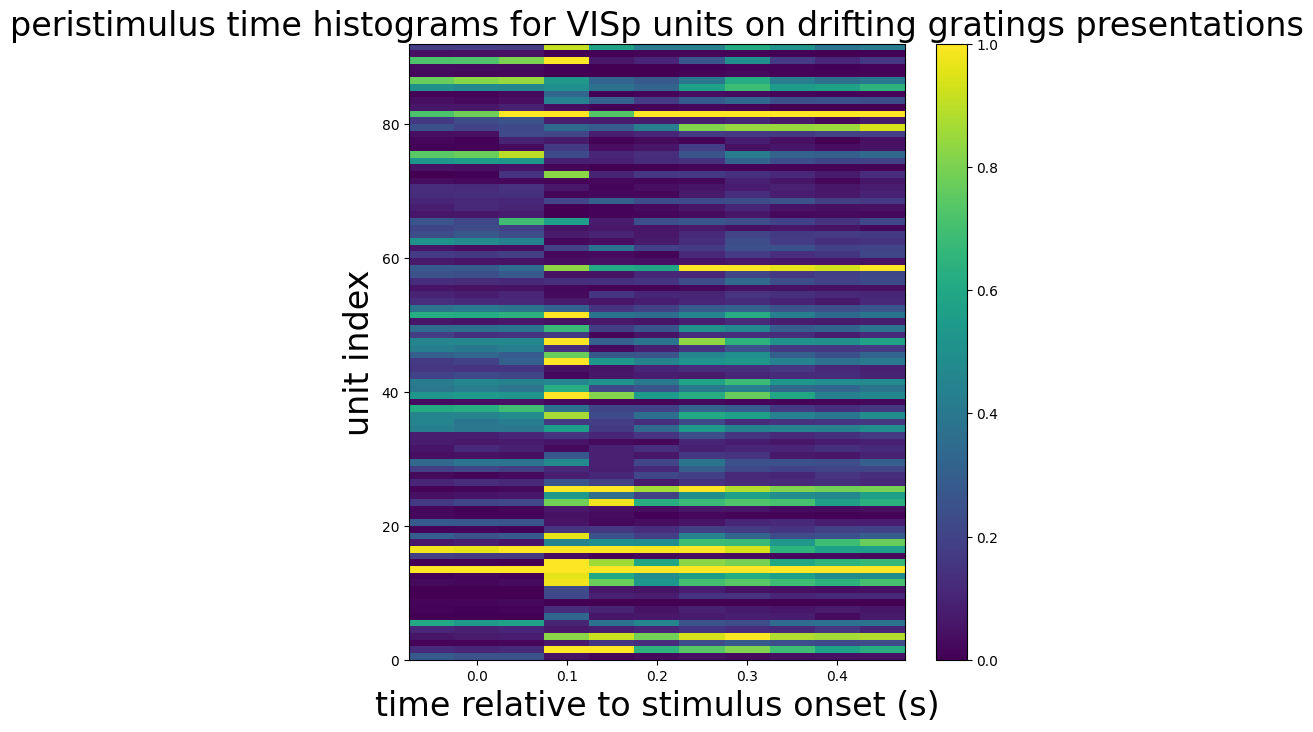

In [419]:
mean_spikes = spikes.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.pcolormesh(
    mean_spikes["time_relative_to_stimulus_onset"], 
    np.arange(mean_spikes["unit_id"].size),
    mean_spikes.T, 
    vmin=0,
    vmax=1
)
fig.colorbar(im, ax=ax)
ax.set_ylabel("unit index", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on drifting gratings presentations", fontsize=24)

plt.show()

### How does each neuron respond specifically to different grating orientations?
- Namely, how much do differences in the presented orientations explain neural variability?
- What's the best way to visualize this?

One approach is to plot the spike counts of a few units as a function of time, averaged across repeats for each unique stimulus grating orientation

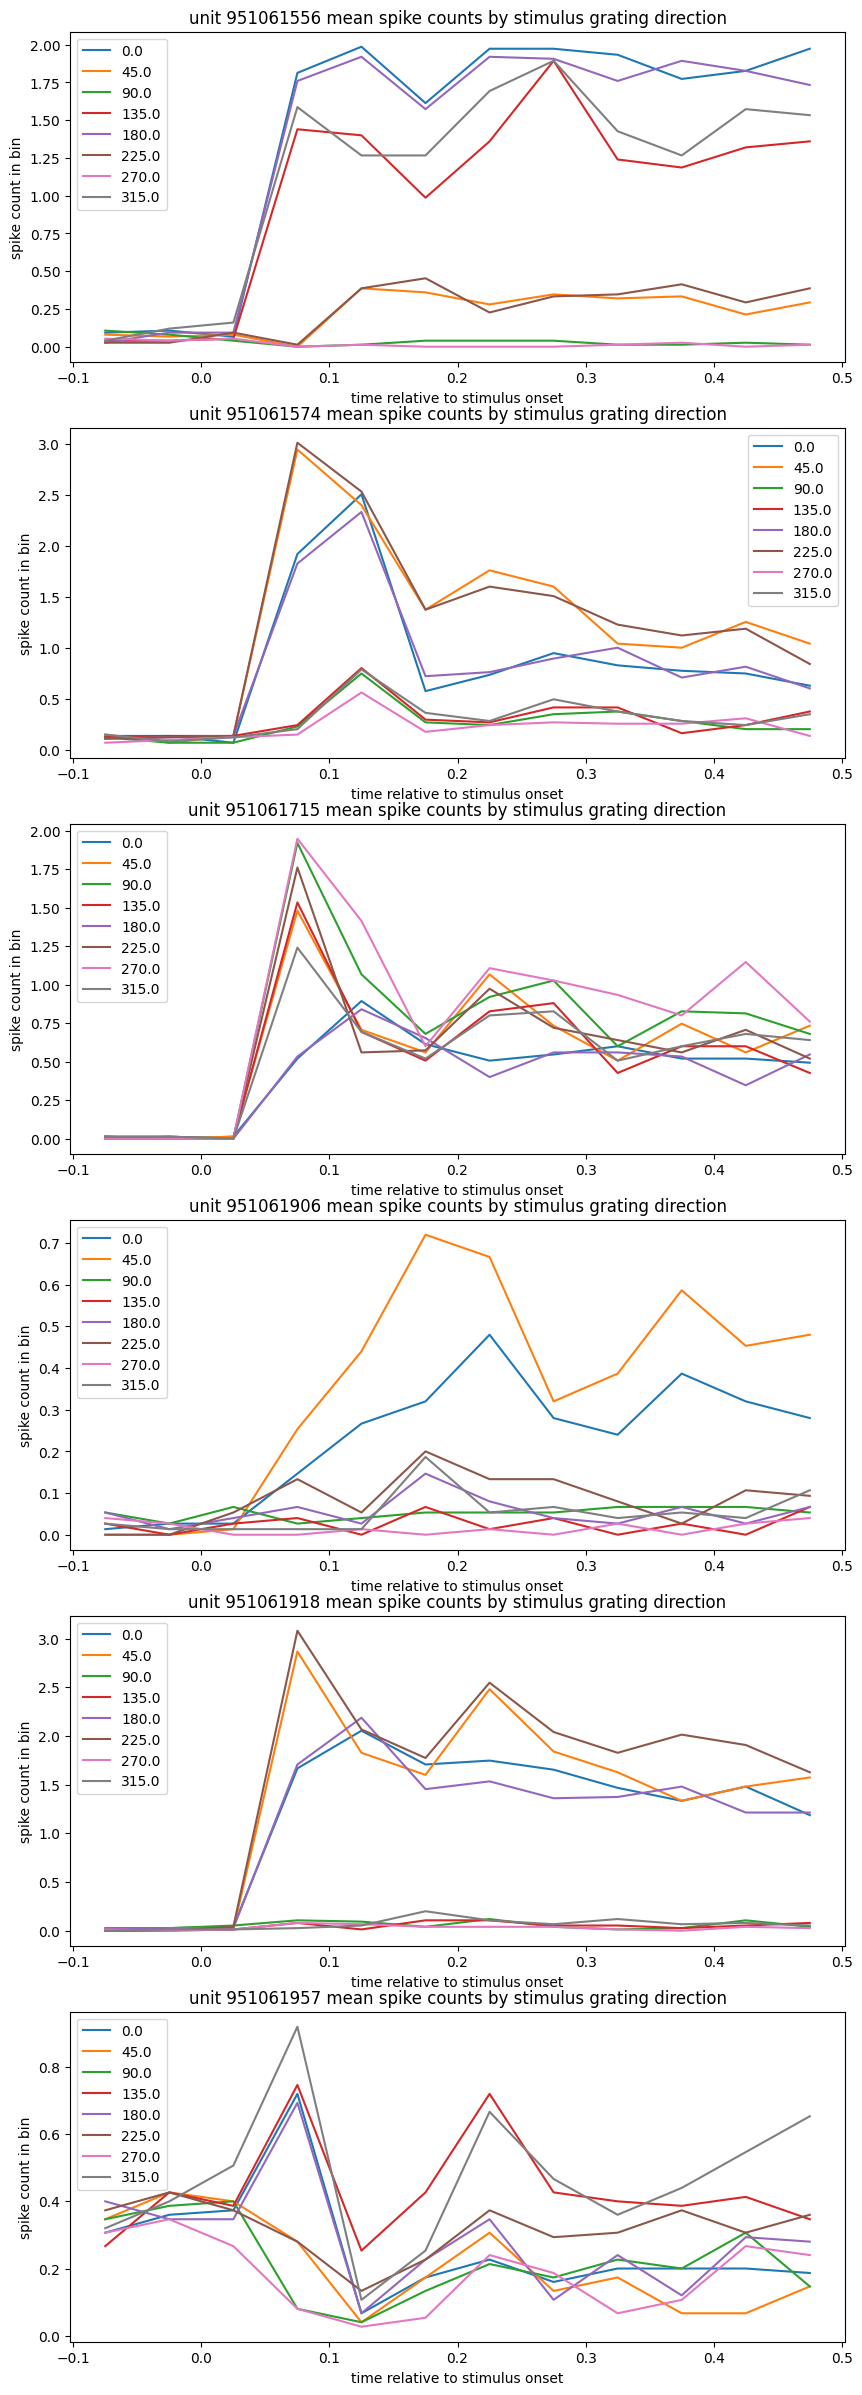

In [420]:
# for each unit, make plots of averaged responses across each orientation, aligned to stim onset

# a list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
interesting_units = [
    951061556,
    951061574,
    951061715,
    951061906,
    951061918,
    951061957
]
fig, ax = plt.subplots(len(interesting_units), 1, figsize=(10, 30))

for i, unit_id in enumerate(interesting_units):
    for orientation in unique_orientations: 
        trial_ids = presentations[presentations.orientation == orientation].index.values        
        data = spikes.loc[trial_ids, :, unit_id]
        mean = data.mean(dim="stimulus_presentation_id")
        ax[i].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
    ax[i].legend()
    ax[i].set_xlabel("time relative to stimulus onset")
    ax[i].set_ylabel("spike count in bin")
    ax[i].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


### Discussion: 
Each line is an average, in reality it varies from trial to trial. Can you visualize the variability?

## How can we explain variability of a single neuron? 
- Let's focus on just a single unit for a moment, here we will look at Unit 951061556. 
- What is a good model for explaining neural activity with the stimulus orientation?

In [421]:
unit_id = 951061556

## Model 1: Stimulus-based regression model. 
One simple first model is to learn the averaged response per orientation, and assume it does not vary with time. 
Using one-hot encoding notation for the stimulus, this can be written as a linear function:
$$ r_t = \textbf{w}^\text{stim} \cdot \textbf{s} $$
Where $r_t $ is neuron's activity, $ \textbf{w}^\text{stim} $ is a vector of weights that will be fit, and $\textbf{s}$ is a one-hot encoding vector stimulus direction. 

### Discussion:
- Here we have chosen to represent our stimulus as one-hot vectors of 8 different directions. We could have alternatively treated the stimulus as a single continuous variable, with our model being: $ r_t = w^\text{stim} \cdot s $. What are the benefits/drawbacks of each choice?

### How should we evaluate our model?
From the lecture, you learned the loss function for fit actually specifies "noise" distribution. Here, we will assume for simplicity a standard Gaussian for noise and use loss metric based on mean-squared error (MSE). Note, the popular $R^2$ metric is directly related to the MSE. 

Below, we define some helper functions to 
- Calculate $R^2$
- Covert stimulus into one-hot encoding

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def calc_r_squared(y_true, y_pred):
    """
    Calculates r^2 metric for true vs predicted labels
    NOTE: could also use .score() from sklearn LinearRegression here, but it's a bit unfitting since
    we'd want to evaluate r^2 for all time points, but are sometimes training different models for each time point. 
    Args: 
        y_true, y_pred of any shape
    """
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(((y_true - y_true.mean()) ** 2))


def get_one_hot_encoding(orientations):
    """
    Generates a one-hot-encoding of stimulus directions
    Args: 
        orientations: an array of orientations as degrees, of length n_trials. Assumes that
            orientations are in 45 degree increments, with 8 unique values. 
    Returns: 
        an array of shape n_trials x 8. array has values either 0 or 1, with one 1 existing per row, 
            indicating which orientations was present for that trial. 
    """
    one_hot = np.zeros((len(orientations), 8))
    orientation_idxs = (orientations / 45).astype(int)
    one_hot[np.arange(len(orientation_idxs)), orientation_idxs] = 1
    return one_hot


To avoid overfitting, we will split our dataset into train and test sets. 

In [423]:
random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)

orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = spikes.loc[train_idxs, :, unit_id].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = spikes.loc[test_idxs, :, unit_id].values

Here, we use sklearn to fit our model. Note that since it is a linear model, and using MSE loss, we can simply use sklearn's `LinearRegression`

In [424]:
# prepare the data matrices for linear regression
num_time_steps = spikes_train.shape[1]
X_train = get_one_hot_encoding(orientations_train).repeat(num_time_steps, axis=0)
Y_train = spikes_train.flatten()
X_test = get_one_hot_encoding(orientations_test).repeat(num_time_steps, axis=0)
Y_test = spikes_test.flatten()

In [425]:
X_train[:5]  # one hot encoding of stimulus

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])

In [426]:
Y_train[:5]  # unit's spike counts over time bins and trials

array([0, 0, 0, 1, 0], dtype=uint16)

In [427]:
# now perform linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)

# caluculate train and test R^2
train_score = calc_r_squared(Y_train, reg.predict(X_train))
test_score = calc_r_squared(Y_test, reg.predict(X_test))
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.29205329475868436
Test Score: 0.28433435880914315


To keep track of train/test scores as we progress in our models, let's define a dict `model_socres` to hold train test scores, with keys of that dict being the model name, and values being a tuple of train/test scores

In [428]:
model_scores = {}
model_scores["Model 1: \n Stim-based"] = (train_score, test_score)

And also define a helper function to help visualize and compare model scores

In [429]:
def plot_model_scores(model_scores):
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 5))
    model_names = list(model_scores.keys())
    x = np.arange(len(model_names))  # the label locations

    train_scores = [model_scores[k][0] for k in model_scores]
    test_scores = [model_scores[k][1] for k in model_scores]

    ax.bar(x, train_scores, width, label="Train")
    ax.bar(x + width, test_scores, width, label="Test")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score ($R^2$)')
    ax.set_title('Model Train/Test scores by comparison')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(model_names)
    ax.legend()

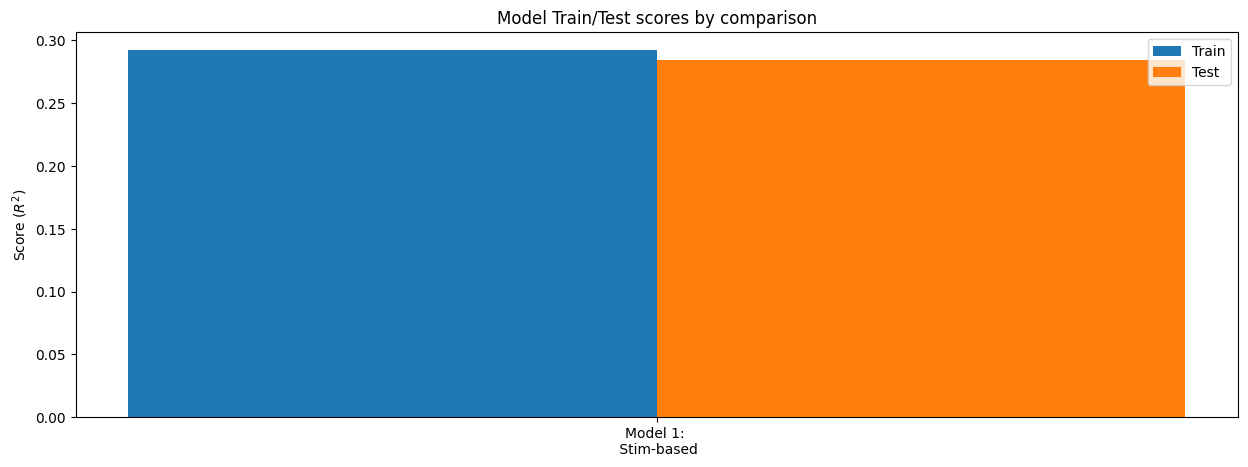

In [430]:
plot_model_scores(model_scores)

## Plot what the model predictions look like for all trials
Now that we have trained our model for this neuron's response, we can see what it's predictions look like against the stimulus-averaged true responses

Text(0.5, 1.0, 'unit 951061556 mean spike counts by stimulus grating direction')

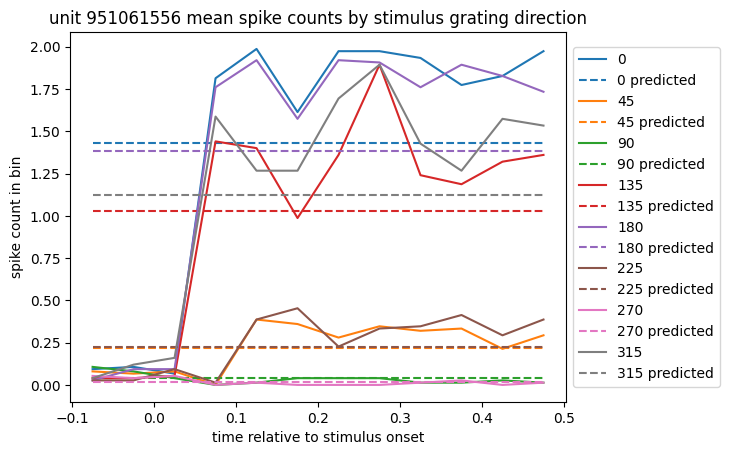

In [431]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots()

for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = spikes.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    line, = ax.plot(data["time_relative_to_stimulus_onset"], mean, label=int(orientation))
    predictions = reg.predict(get_one_hot_encoding(np.array([orientation]).repeat(num_time_steps)))
    ax.plot(data["time_relative_to_stimulus_onset"], predictions, color=line.get_color(), linestyle="--", label=f"{int(orientation)} predicted")

lgd_bbox_to_anchor = (1., 0.5)
lgd_loc = "center left"
ax.legend(bbox_to_anchor=lgd_bbox_to_anchor, loc=lgd_loc)
ax.set_xlabel("time relative to stimulus onset")
ax.set_ylabel("spike count in bin")
ax.set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")

By design, the predicted response to each orientation can not vary with time, therefore fails to capture the unit's variation over time. How could we improve our model?

### Exercises:
- Repeat the above visualization for train and test sets separately
- Visualize the predicted response by orientation. In other words, plot out the orientation tuning curve of this neuron
- Is the neuron orientation or direction selective?

Text(0.5, 1.0, 'unit 951061556 tuning curve by stimulus grating direction')

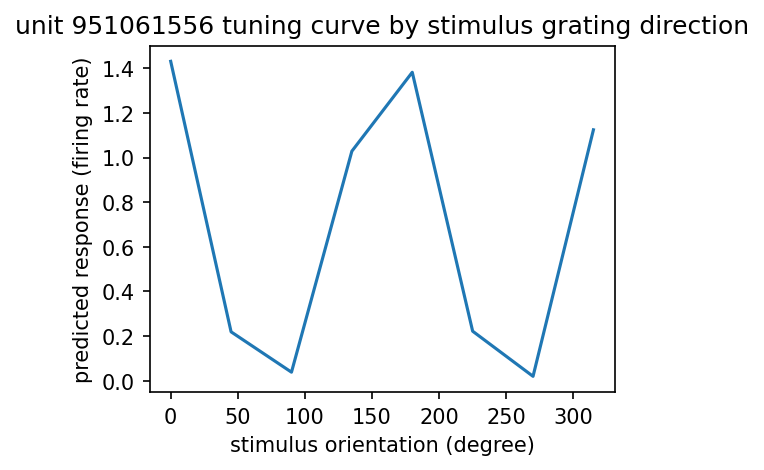

In [432]:
# link to tuning curve
fig, ax = plt.subplots(figsize=(4,3), dpi=150)
predictions = []
for orientation in unique_orientations: 
    prediction = reg.predict(get_one_hot_encoding(np.array([orientation]).repeat(num_time_steps)))[0]
    predictions.append(prediction)
ax.plot(unique_orientations, predictions)
ax.set_xlabel("stimulus orientation (degree)")
ax.set_ylabel("predicted response (firing rate)")
ax.set_title(f"unit {unit_id} tuning curve by stimulus grating direction")

### Observation
unit 951061556 is an orientation-selective unit instead of a direction-selective one, and most sensitive to horizontal gratings (equally responsive to 0, 180, 360-degree gratings)

## Model 2: Stimulus based regression with time-varying weights
The previous model made the simpifying assumption that stimulus orientation's contribution to neuronal response is constant across the time course of a trial, hence was only able to predict constant responses over time. What if we loosened this assumption a bit, and fit a separate regression per-time-bin? Our model now becomes: 
$$ r_t = \textbf{w}^{stim}_t \cdot \textbf{s} $$
Where: 
- $ \textbf{w}^{stim}_t $ is still a vector of learned weights, but varies by time
- $ \textbf{s} $ is still one-hot encoding vector stimulus direction. This has no time component as the stimulus direction does not change within a trial. 

Effectively we are training separate regression models per time bin

### Discussion: 
What are the drawbacks of this model? What are some interesting insights this model **could miss**?

### Train models

In [433]:
lin_reg_results = []
Y_train_preds = []
Y_test_preds = []

# per time bin, train a separate model
for i in range(spikes_train.shape[1]):
    reg = LinearRegression()
    X_train = get_one_hot_encoding(orientations_train)
    Y_train = spikes_train[:, i]

    X_test = get_one_hot_encoding(orientations_test)

    reg.fit(X_train, Y_train)

    lin_reg_results.append(reg)    
    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))


### Evaluate train and test scores

In [434]:
train_score = calc_r_squared(spikes_train, np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test, np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.5120568812347003
Test Score: 0.497783412614355


Now, we can compare our model performance against the previous Model 1 

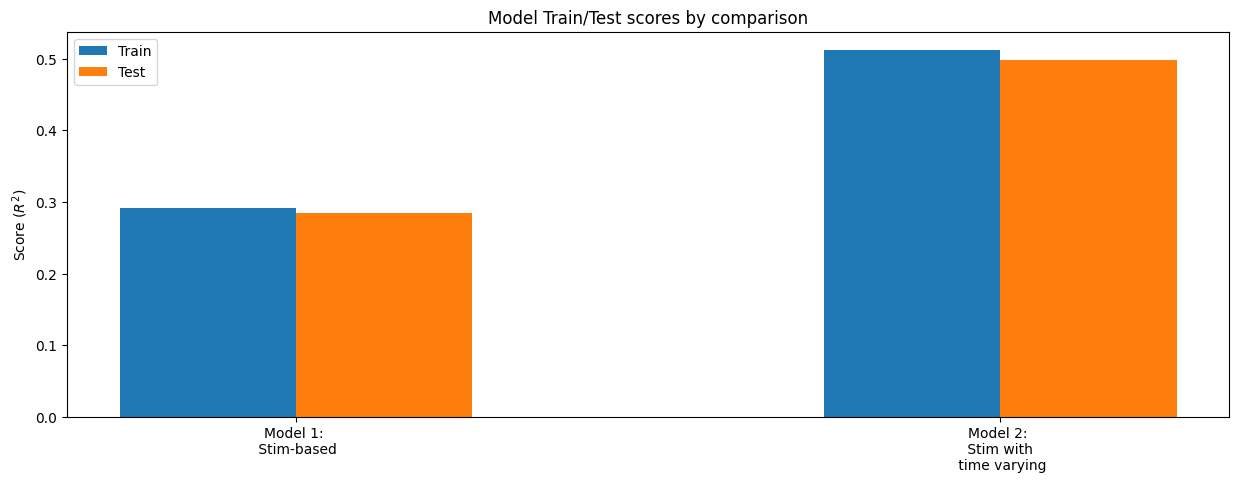

In [435]:
model_scores["Model 2: \n Stim with \n time varying"] = (train_score, test_score)
plot_model_scores(model_scores)

## Visualize model predictions

Text(0.5, 1.0, 'unit 951061556 mean spike counts by stimulus grating direction')

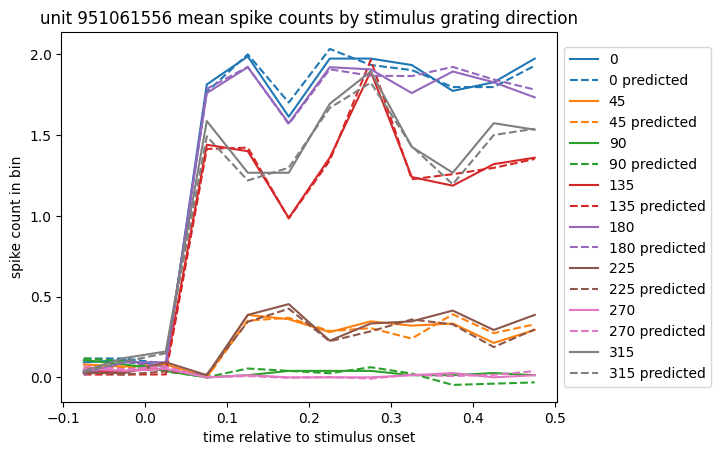

In [436]:
# plot regression result
fig, ax = plt.subplots()

for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = spikes.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    line, = ax.plot(data["time_relative_to_stimulus_onset"], mean, label=int(orientation))
    predictions = [reg.predict(get_one_hot_encoding(np.array([orientation]))) for reg in lin_reg_results]
    ax.plot(data["time_relative_to_stimulus_onset"], predictions, color=line.get_color(), linestyle="--", label=f"{int(orientation)} predicted")
lgd_bbox_to_anchor = (1., 0.5)
lgd_loc = "center left"
ax.legend(bbox_to_anchor=lgd_bbox_to_anchor, loc=lgd_loc)
ax.set_xlabel("time relative to stimulus onset")
ax.set_ylabel("spike count in bin")
ax.set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")

## What about the rest of the variability?
So far, our model has gotten fairly good at matching the stimulus-averaged responses of this neuron, though looking at the $ R^2 $ score, this still doesn't explain all of the neural variability. How variable is neuron's activity within the same stimulus condition?

To answer this question, we can plot the per-trial activity of our neuron within the same stimulus condition, plotting the mean, standard deviation, and a few example trial activities.

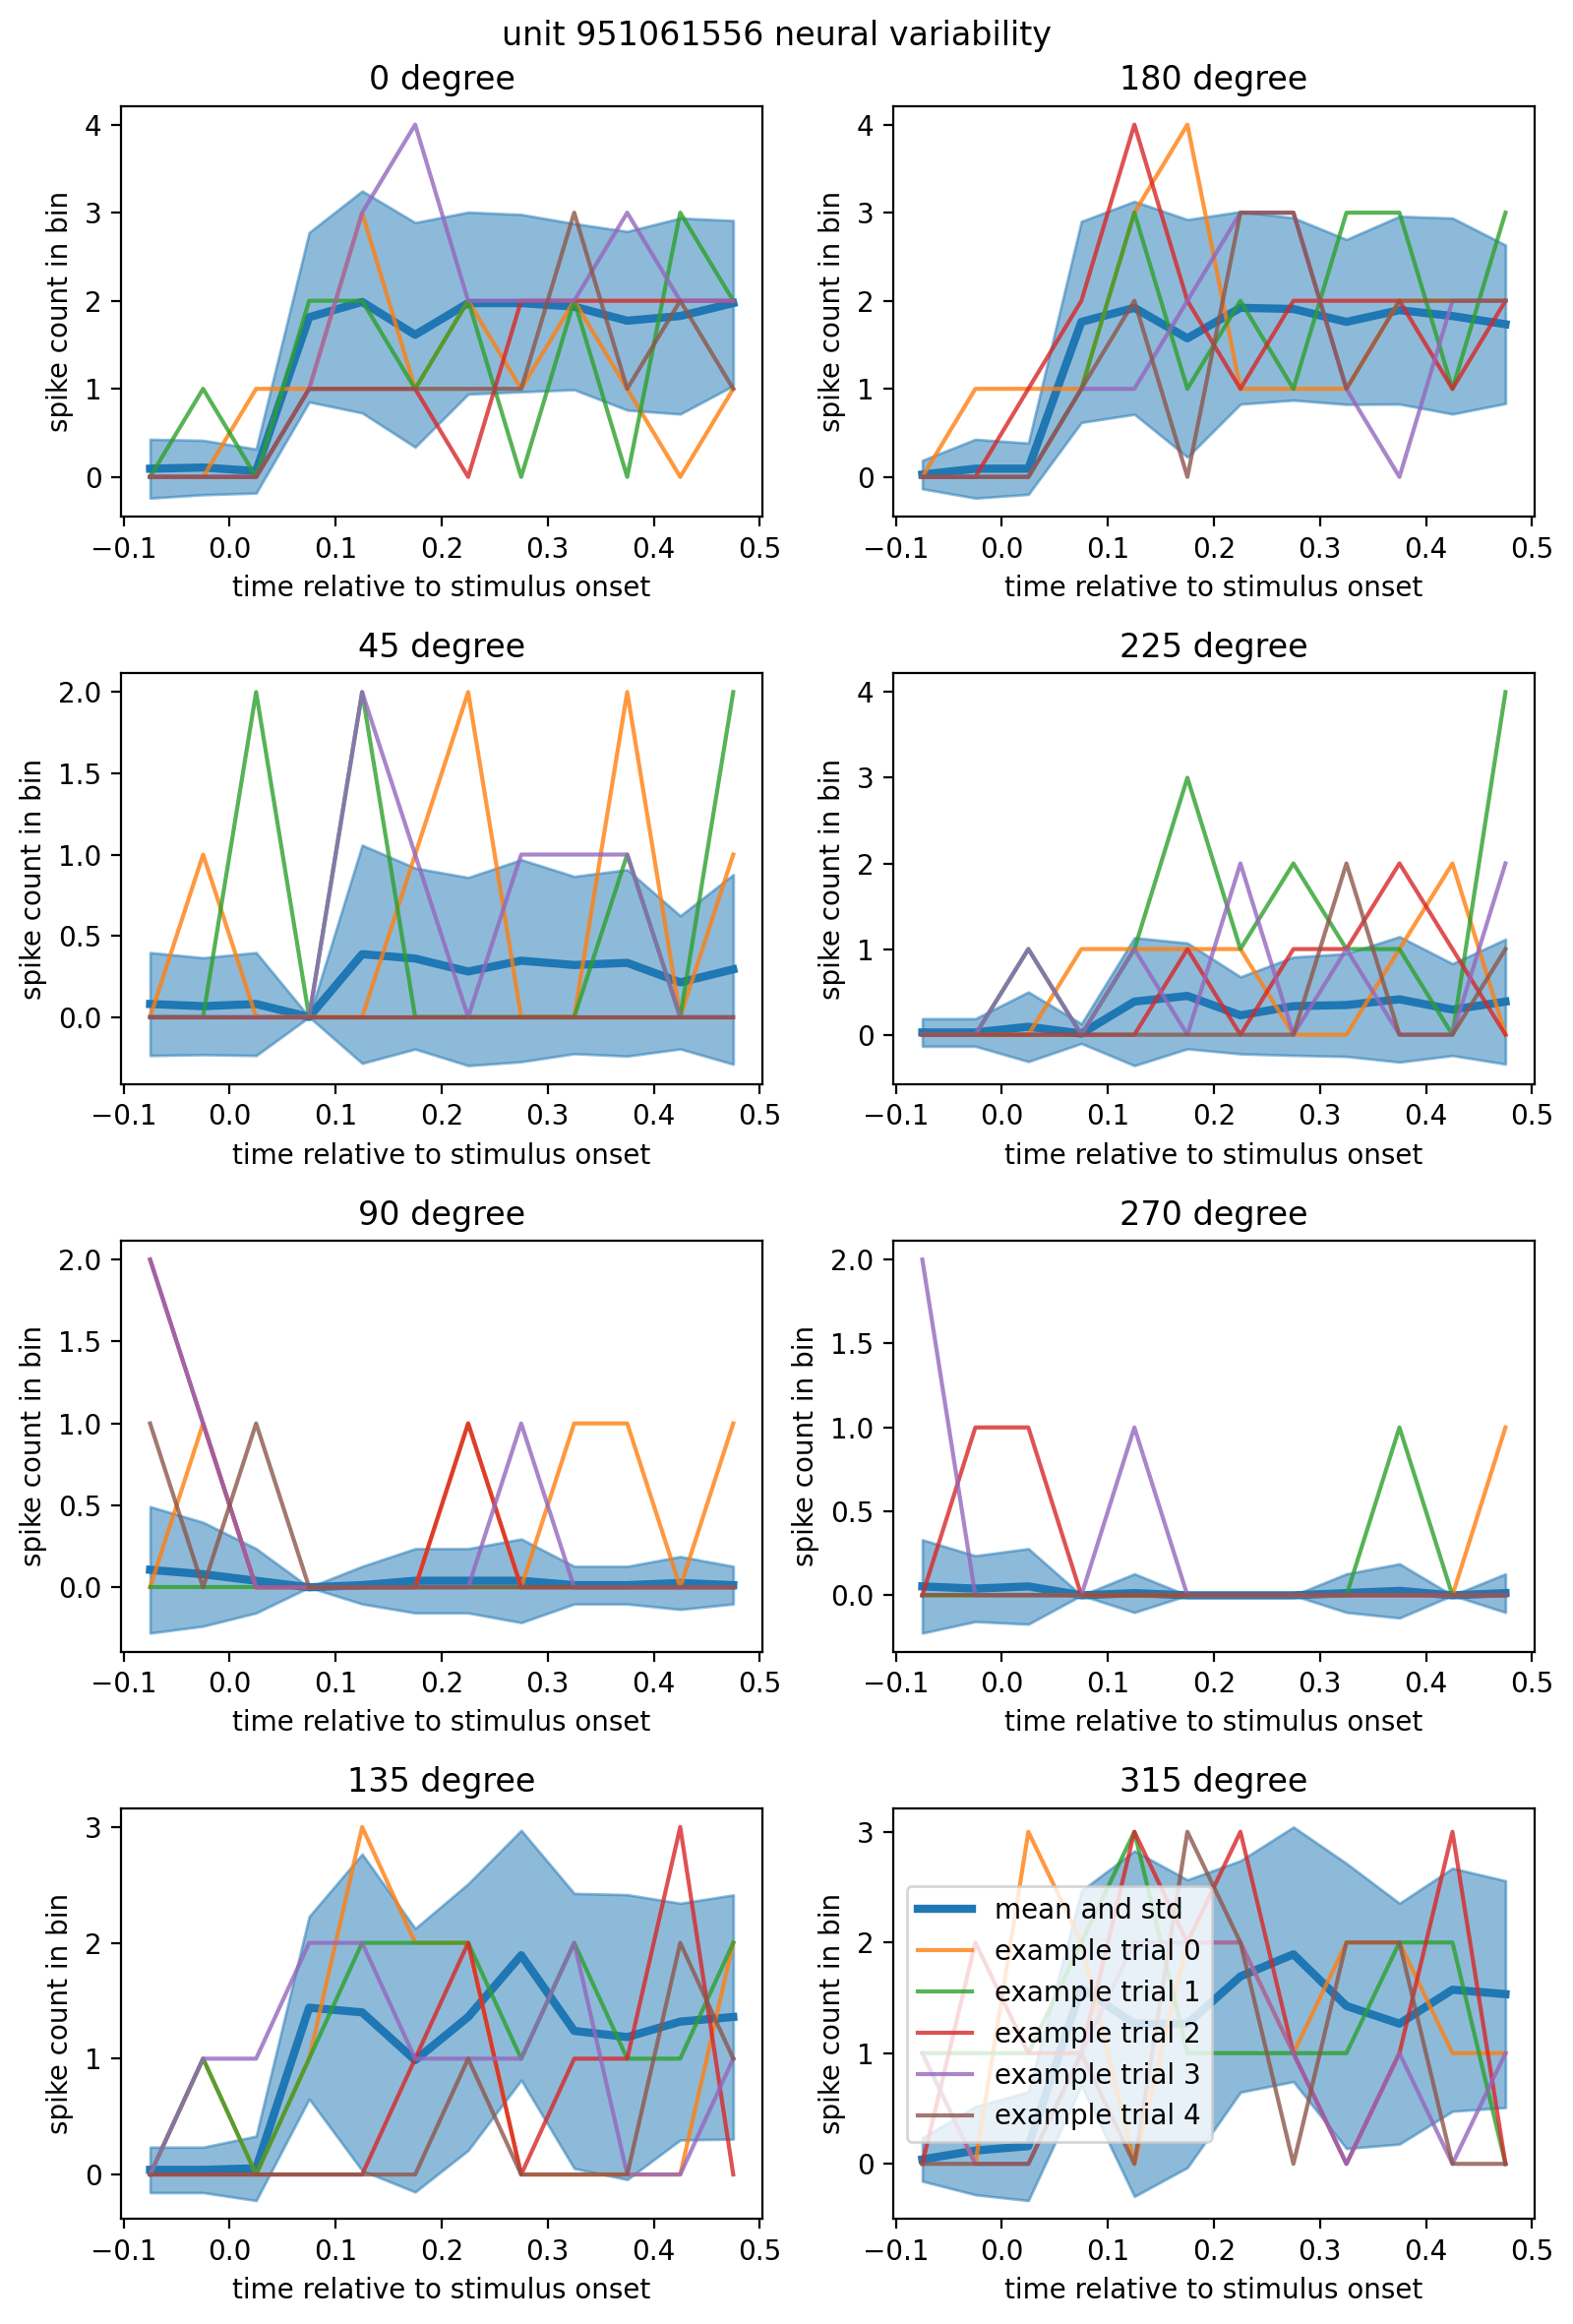

In [437]:
num_example_trials_to_plot = 5
fig, axs = plt.subplots(4,2, figsize=(8,12), dpi=200)

for orientation_id, orientation in enumerate(unique_orientations):
    row = int(orientation_id% 4)
    col = int(orientation_id/ 4)
    ax = axs[row, col]
    
    trial_ids = presentations[presentations.orientation == orientation].index.values 
    data = spikes.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    mean_line, = ax.plot(data["time_relative_to_stimulus_onset"], mean, label="mean and std", lw=3)
    std = data.std(dim="stimulus_presentation_id")
    std_line = ax.fill_between(data["time_relative_to_stimulus_onset"], mean - std, mean + std, color=mean_line.get_color(), alpha=0.5)

    for i in range(num_example_trials_to_plot):
          ax.plot(data["time_relative_to_stimulus_onset"], data[i, :], label=f"example trial {i}", alpha=0.8)
    ax.set_xlabel("time relative to stimulus onset")
    ax.set_ylabel("spike count in bin")
    ax.set_title(f"{int(orientation)} degree")

plt.legend()    
fig.suptitle(f"unit {unit_id} neural variability")
fig.tight_layout()

Observation: 
- There is substantial variability within stimulus condition across trials
- Within each trial, the neural response trajectory is **somewhat** smooth $\to$ there are some temporal correlations

# Capturing the temporal relationship in neural responses

## Some visualization helper functions

## Model 3: stimulus + 1 time bin back regression
One idea for trying to explain stimulus-conditioned trial-by-trial variability is to assume that a neuron's activity at a certain timepoint depends on its activity at the previous timepoint. This would mean introducing an *auto-regressive* component to our model: 

$$ r_t = \textbf{w}^\text{stim}_t \cdot \textbf{s} + w^\text{auto}_{t} r_{t-1} $$

Where: 
- $ w^\text{auto}_t $ is the learned weight capturing how previous time bin $t - 1$ activity influences the target time bin $t$ activity. Note: here we're still learning a different weight per time bin. 
- $ r_{t-1} $ is our neuron's activity at $t - 1$

With this model, we ask: per timestep, is variation in activity explained by stim orientation as well as previous activity?

First, we can define a helper function that will help generate inputs for our model, from both the stimulus orientation and the unit's past spiking data:
NOTE: we're defining a more generic version here, with a `lag` parameter. This will be helpful in later models, where we introduce the concept of lag. 

In [438]:
def get_X_auto_reg(spikes, orientations, t, lag=1):
    """
    Generates a input data matrix for the lag time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        t: index of time bin
    """
    orientations_one_hot = get_one_hot_encoding(orientations)
    spikes_design_matrix = spikes[:, t-lag:t]
    
    return np.concatenate([orientations_one_hot, spikes_design_matrix], axis=1)

Let's test out this function and see what it returns

In [439]:
t = 5
X = get_X_auto_reg(spikes_train, orientations_train, t)
print(X[:5, :8])
print(X[:5, -1:])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
[[0.]
 [0.]
 [1.]
 [0.]
 [2.]]


Next we'll train our model. Here, we're still training our model per time bin

In [440]:
auto_reg_results = []
Y_train_preds = []
Y_test_preds = []
for i in range(spikes_train.shape[1]):
    if i >= 1:
        reg = LinearRegression()
        X_train = get_X_auto_reg(spikes_train, orientations_train, i)
        X_test = get_X_auto_reg(spikes_test, orientations_test, i)

        Y_train = spikes_train[:, i]
        reg.fit(X_train, Y_train)
        auto_reg_results.append(reg)

        Y_train_preds.append(reg.predict(X_train))
        Y_test_preds.append(reg.predict(X_test))

In [441]:
train_score = calc_r_squared(spikes_train[:, 1:], np.vstack(Y_train_preds).T)
test_score = calc_r_squared(spikes_test[:, 1:], np.vstack(Y_test_preds).T)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.5472095189987949
Test Score: 0.5215768729177885


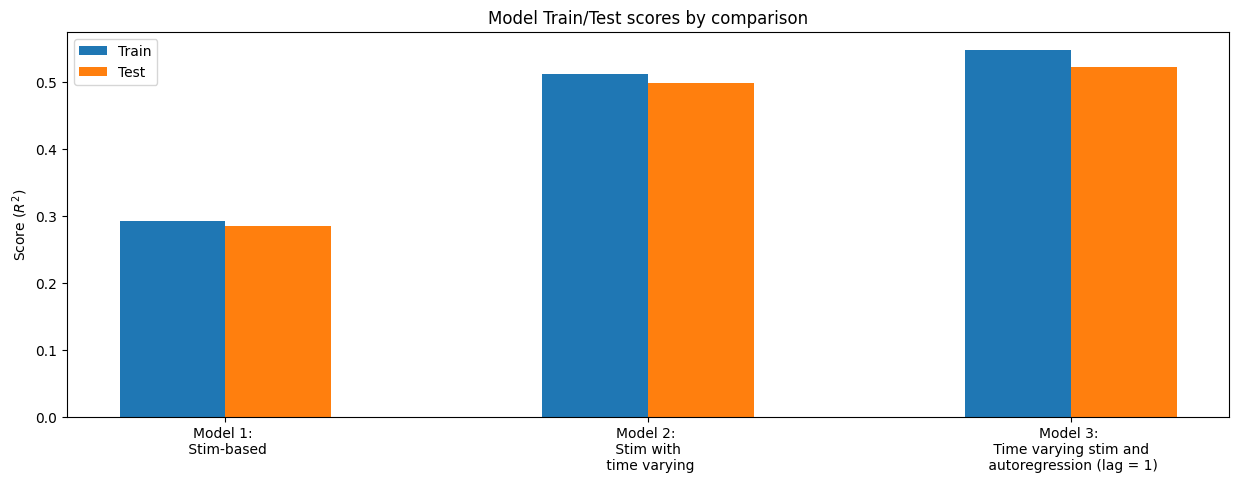

In [442]:
model_scores["Model 3: \n Time varying stim and \n autoregression (lag = 1)"] = (train_score, test_score)
plot_model_scores(model_scores)

### Observation
Autoregressive models with 1 time-bin back history add slight improvements to the $R^2$ score (from 0.49 to 0.52 on the test set.)

## Visualize Autoregressive model results
To see how well our model is capturing stimulus-conditioned variability, we can take some example trials from a specific stimulus direction (0 degrees) and plot the true trial activity (in solid lines) against the predicted trial activity (in dotted lines). 


In [443]:
# plot regression result
def plot_example_trial_results(spikes, models, orientation, n_examples, get_X_func, lag=1, all_spikes_for_reg=False):
    """
    Plot the first n example trial activities of a specific orientation 
    against predicted activities from a model
    Args: 
        spikes: data matrix containing trial spike activity, trials x times x units
        models: 
        orientation: orientation to sub-select for
        n_examples: number of examples to plot
        get_X_func: function to convert spikes/orientations to regression inputs
        lag: how much lag to include for autoregression
        all_spikes_for_reg: whether or not to pass all units spikes into 
    """
    trial_ids = presentations[presentations.orientation == orientation].index.values    
    trial_spikes = spikes.loc[trial_ids, :, :]
    ex_spikes = trial_spikes[:n_examples, : , :]
    ex_unit_data = ex_spikes.loc[:, :, unit_id]
    repeat_orientations = np.repeat(orientation, n_examples)
    
    predictions = []

    for t in range(lag, ex_unit_data.shape[1]):
        model = models[0] if len(models) == 1 else models[t-lag]
        if all_spikes_for_reg:
            X = get_X_func(ex_spikes, repeat_orientations, t, lag)
        else:
            X = get_X_func(ex_unit_data, repeat_orientations, t, lag)
        Y = model.predict(X)
        predictions.append(Y)
    predictions = np.vstack(predictions).T
    time_bins = data["time_relative_to_stimulus_onset"]
    fig, ax = plt.subplots(n_examples, 1, figsize=(4, n_examples * 2.5))
    for i in range(ex_unit_data.shape[0]):
        line, = ax[i].plot(time_bins, ex_unit_data[i, :], label="True trial Activity")  
        ax[i].plot(time_bins[lag:], predictions[i, :], label="Predicted", color=line.get_color(), linestyle="--")
        ax[i].set_xlabel("time relative to stimulus onset")
        ax[i].set_ylabel("predicted spike count in bin")
    plt.legend()    
    fig.suptitle(f"unit {unit_id} example traces for orientation {orientation} degrees")
    fig.tight_layout()
    
    
    
# plot regression result
def plot_averaged_auto_regressive_predictions(spikes, models, unique_orientations, get_X_func, lag=1, all_spikes_for_reg=False):
    """
    Helper function to plot predictions from auto regressive models 
    averaged by stimulus, against true neural activity also averaged by stimulus
    Args: 
        spikes: spike data, of trials x time x unit
        
    """
    fig, ax = plt.subplots()
    for orientation in unique_orientations: 
        trial_ids = presentations[presentations.orientation == orientation].index.values        
        data = spikes.loc[trial_ids, :, unit_id]

        trial_spikes = spikes.loc[trial_ids, :, :]
        unit_data = trial_spikes.loc[:, :, unit_id]
        
        
        time_bins= unit_data["time_relative_to_stimulus_onset"]
        num_tim_bins = len(time_bins)

        mean = unit_data.mean(dim="stimulus_presentation_id")
        line, = ax.plot(time_bins, mean, label=int(orientation))
        pred_mean_responses = np.empty(num_tim_bins - lag)
        orientations = np.repeat(orientation, len(trial_ids))
        for i in range(num_tim_bins - lag):
            model = models[0] if len(models) == 1 else models[i]
            time_bin_idx = i + lag
            if all_spikes_for_reg:
                X = get_X_func(trial_spikes, orientations, time_bin_idx, lag)
            else:
                X = get_X_func(unit_data, orientations, time_bin_idx, lag)
            Y = model.predict(X)
            pred_mean_responses[i] = np.mean(Y)    
        ax.plot(time_bins[lag:], pred_mean_responses, color=line.get_color(), linestyle="--", label=f"{int(orientation)} predicted")
    lgd_bbox_to_anchor = (1., 0.5)
    lgd_loc = "center left"
    ax.legend(bbox_to_anchor=lgd_bbox_to_anchor, loc=lgd_loc)
    ax.set_xlabel("time relative to stimulus onset")
    ax.set_ylabel("spike count in bin")
    ax.set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")

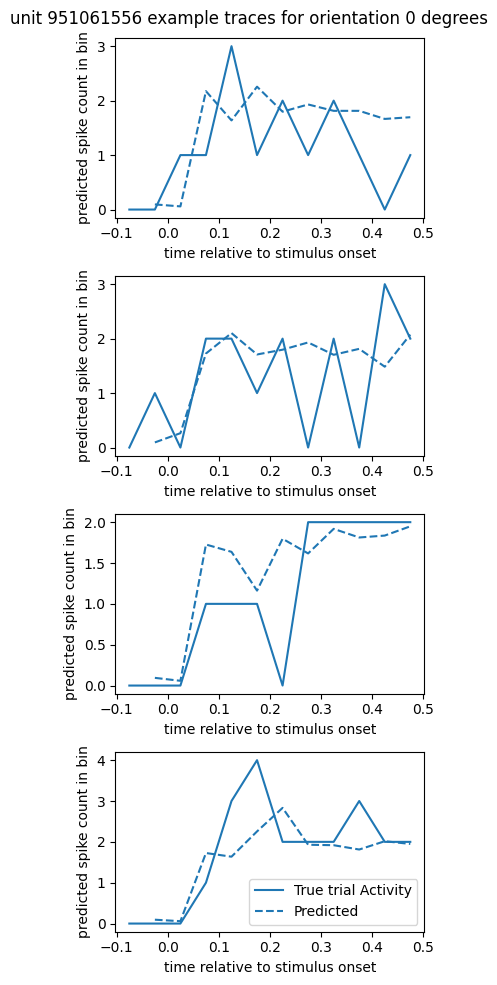

In [444]:
plot_example_trial_results(
    spikes=spikes, 
    models=auto_reg_results, 
    orientation=0, 
    n_examples=4,
    get_X_func=get_X_auto_reg
)

### Exercise:
Redo the plots above for different orientations, use the defined helper function `plot_example_trial_results()`, and refer to how it is used above

We can also look at how well our model predicts trial-averaged, stimulus-conditioned responses over time

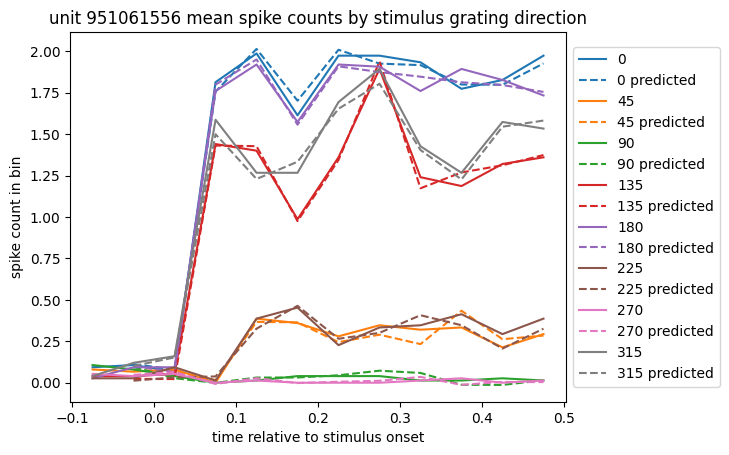

In [445]:
plot_averaged_auto_regressive_predictions(
    spikes=spikes,
    models=auto_reg_results,
    unique_orientations=unique_orientations,
    get_X_func=get_X_auto_reg,
)

## Model 4: Same autoregressive model, longer temporal dependency
Previously, our model only depended on the unit's own activity one time step back, but what if we added more time steps? Our model becomes:
$$ r_t = \textbf{w}^\text{stim}_t \cdot \textbf{s} + \sum_{l=1}^L w^\text{auto}_{t,l} r_{t-l} $$
Where: 
- $L$ is the maximum number of time steps back to consider, or the lag
- $ w^\text{auto}_{t,l} $ is the weight learned for how the neural activity $l$ time steps back (or $ r_{t-l} $) influences current neural activity at time $ t $

How does the $R^2$ vary with choice of lag L we choose?

### Discussion: 
What could be some insights from this model? What are some limitations?

In the cell below, we'll loop through different lag (L) values, and fit a series of linear regressions per time bin for each lag. 
We'll use the same `get_X_auto_reg()` function defined previously to generate our inputs, this time passing in a `lag` parameter

In [446]:
train_scores = []
test_scores = []
auto_reg_results = {}

for n_lag in range(0, 8):
    auto_reg_fits = []
    Y_train_preds = []
    Y_test_preds = []
    
    for time_idx in range(spikes_train.shape[1]):
        if time_idx >= n_lag:
            reg = LinearRegression()
            # grab 
            X_train = get_X_auto_reg(spikes_train, orientations_train, time_idx, lag=n_lag)
            X_test = get_X_auto_reg(spikes_test, orientations_test, time_idx, lag=n_lag)

            Y_train = spikes_train[:, time_idx]
            reg.fit(X_train, Y_train)
            auto_reg_fits.append(reg)

            Y_train_preds.append(reg.predict(X_train))
            Y_test_preds.append(reg.predict(X_test))
            
    train_score = calc_r_squared(spikes_train[:, n_lag:], np.vstack(Y_train_preds).T)
    test_score = calc_r_squared(spikes_test[:, n_lag:], np.vstack(Y_test_preds).T)
    train_scores.append(train_score)
    test_scores.append(test_score)
    auto_reg_results[n_lag] = auto_reg_fits

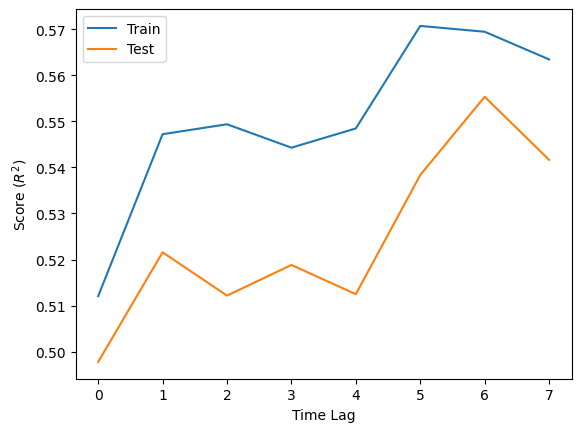

In [447]:
fig, ax = plt.subplots()
ax.plot(range(0, 8), train_scores, label="Train")
ax.plot(range(0, 8), test_scores, label="Test")
ax.set_xlabel("Time Lag")
ax.set_ylabel("Score ($R^2$)")
ax.legend()

Let's plot the model with lag = 6 performance alongside all the previous models

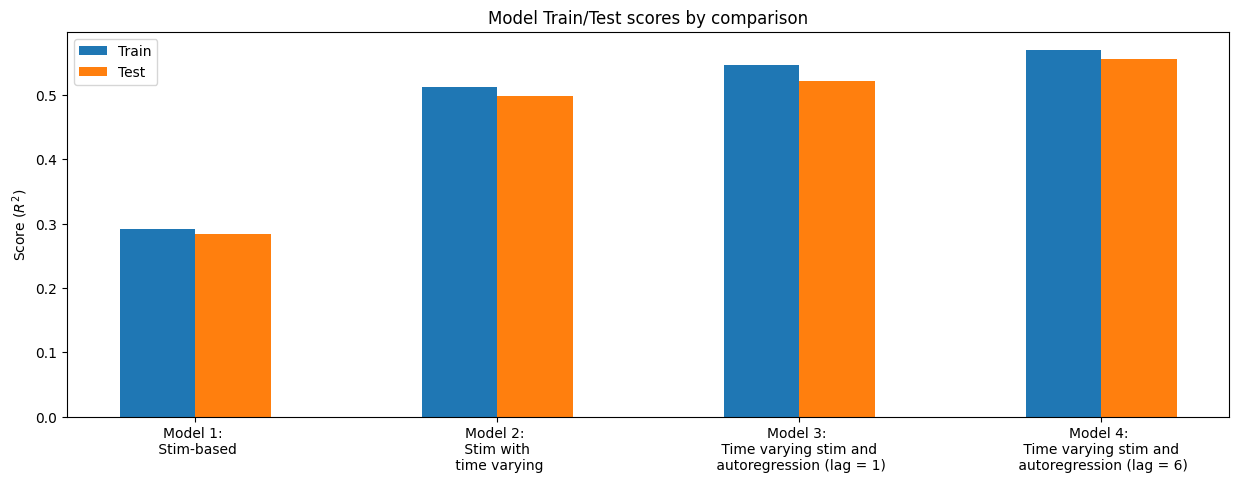

In [448]:
model_scores["Model 4: \n Time varying stim and \n autoregression (lag = 6)"] = (train_scores[6], test_scores[6])
plot_model_scores(model_scores)

## Visualize example predictions from lag = 6 model

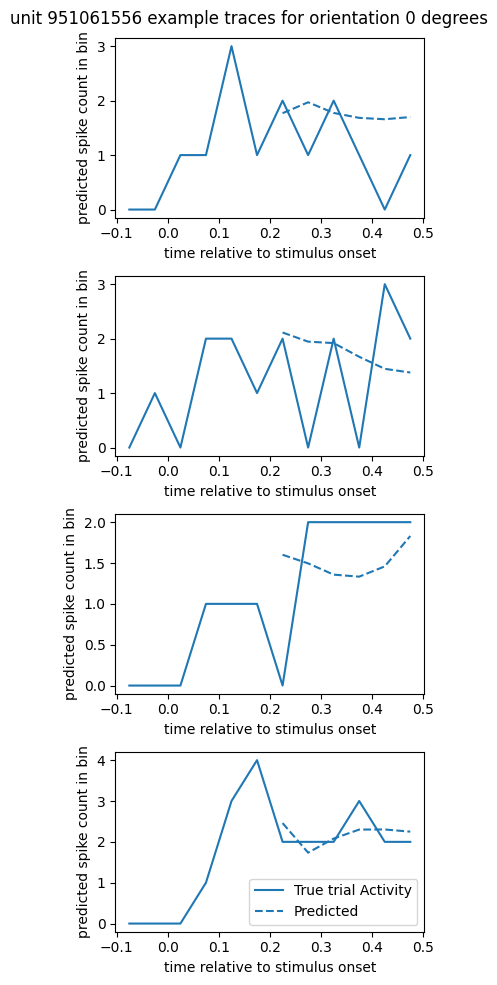

In [449]:
plot_example_trial_results(
    spikes=spikes, 
    models=auto_reg_results[6], 
    orientation=0, 
    n_examples=4,
    get_X_func=get_X_auto_reg,
    lag=6
)

### Discussion
Can you spot an issue with the current evaluation of models with time lag, especially with higher lags? How would you fix it?

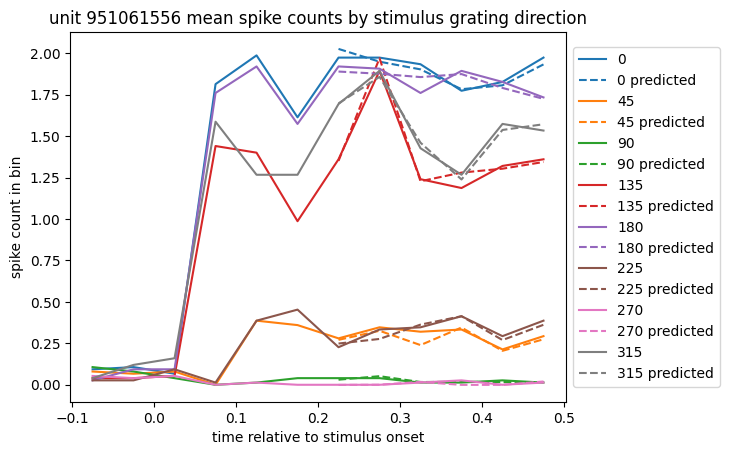

In [450]:
plot_averaged_auto_regressive_predictions(
    spikes=spikes,
    models=auto_reg_results[6],
    unique_orientations=unique_orientations,
    get_X_func=get_X_auto_reg,
    lag=6
)

### Observation
adding more lags to the autoregressive models may increases the r2 score. In this unit, with n_lag=6 we have the best model with r2 score up to 0.55 in the test set.

## Gaining insights from the model: how do auto-regressive weights change over the course of a trial?

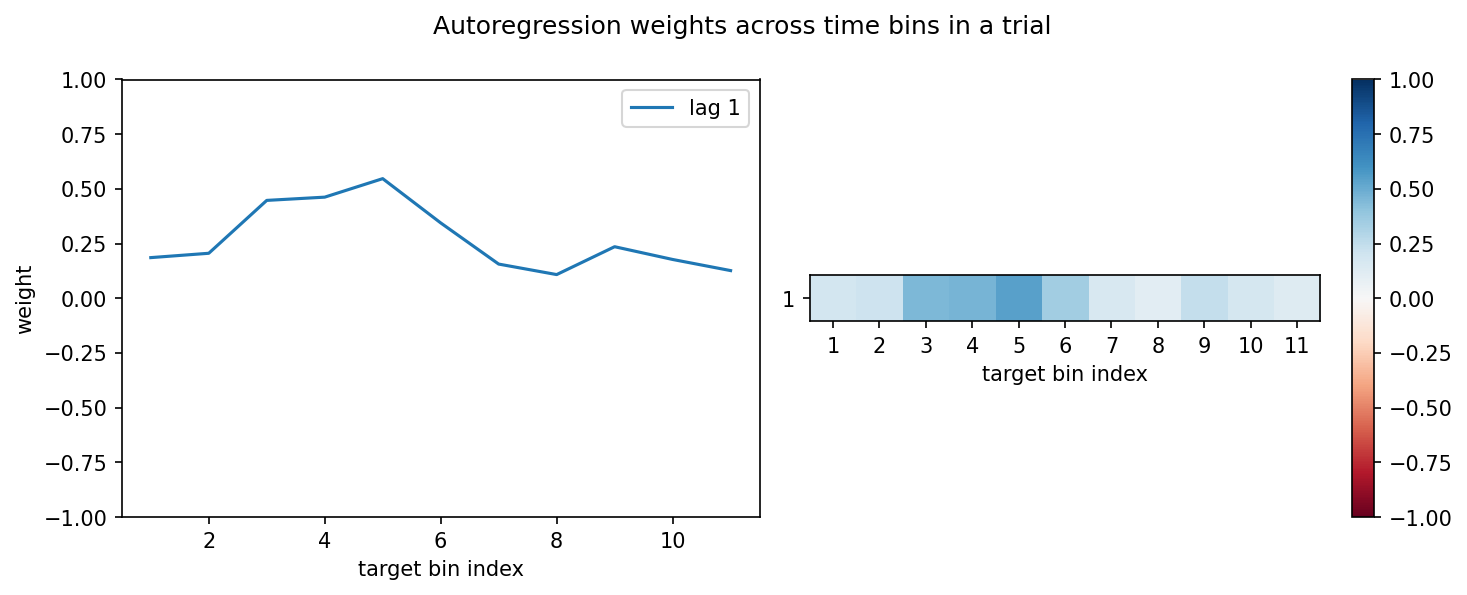

In [451]:
# use time_lag=1 model as an exmaple
lag_model = 1
reg_coeff = []
for i, reg in enumerate(auto_reg_results[lag_model]):
    reg_coeff.append(reg.coef_[8:])
reg_coeff = np.array(reg_coeff)

# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

ax = axs[0]
for j in range(reg_coeff.shape[1]):
    ax.plot(np.arange(lag_model, lag_model+reg_coeff.shape[0]), reg_coeff[:, j], 
            label=f'lag {lag_model-j}')
ax.set_ylim(-1, 1)
ax.set_xlabel("target bin index")
ax.set_ylabel("weight")
ax.legend()

ax = axs[1]
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(lag_model, lag_model+reg_coeff.shape[0]))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(np.arange(reg_coeff.shape[1], 0, -1))
ax.set_xlabel("target bin index")

fig.suptitle("Autoregression weights across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

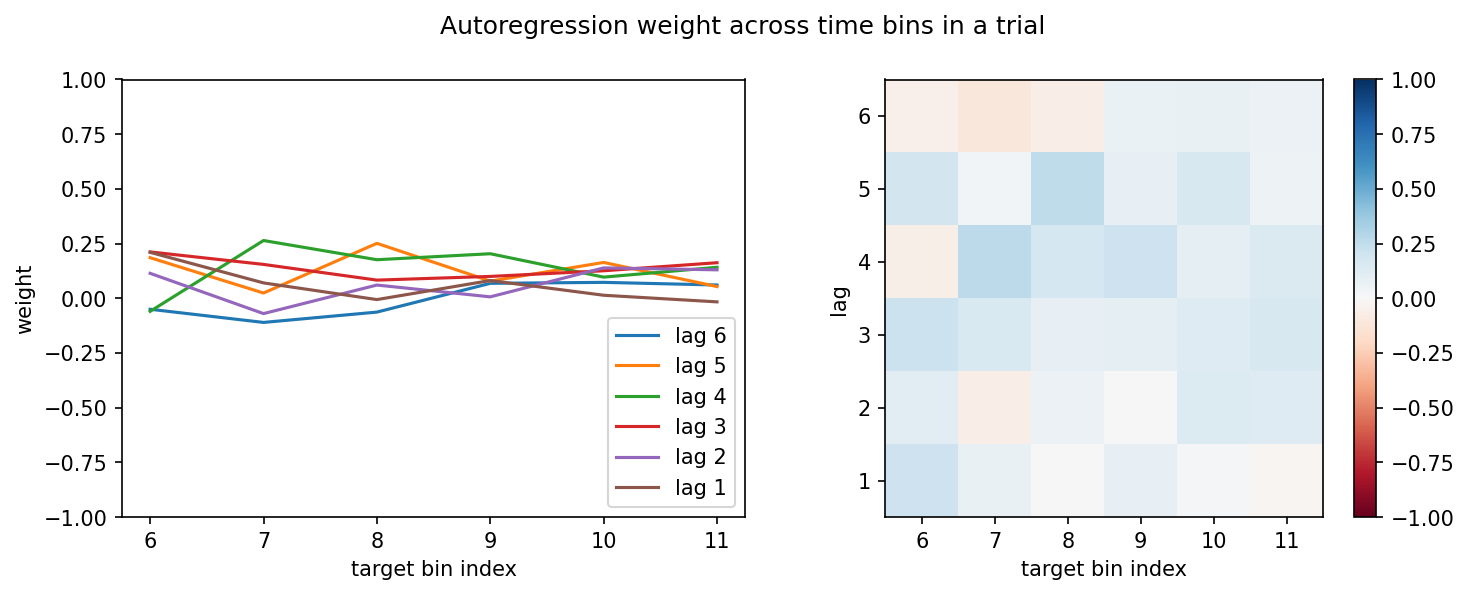

In [452]:
# use time_lag=6 model as an exmaple

lag_model = 6
reg_coeff = []
for i, reg in enumerate(auto_reg_results[lag_model]):
    reg_coeff.append(reg.coef_[8:])
reg_coeff = np.array(reg_coeff)


# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)

ax = axs[0]
for j in range(reg_coeff.shape[1]):
    ax.plot(np.arange(lag_model, lag_model+reg_coeff.shape[0]), reg_coeff[:, j], 
            label=f'lag {lag_model-j}')
ax.set_ylim(-1, 1)
ax.set_xlabel("target bin index")
ax.set_ylabel("weight")
ax.legend()

ax = axs[1]
im = ax.imshow(reg_coeff.T, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(reg_coeff.shape[0]))
ax.set_xticklabels(np.arange(lag_model, lag_model+reg_coeff.shape[0]))
ax.set_yticks(np.arange(reg_coeff.shape[1]))
ax.set_yticklabels(np.arange(reg_coeff.shape[1], 0, -1))
ax.set_xlabel("target bin index")
ax.set_ylabel("lag")

fig.suptitle("Autoregression weight across time bins in a trial")
fig.colorbar(im, ax=ax)
fig.tight_layout()

### Observation
The weights for autoregression seem reaonsably consistent across different target time bins. 

## Model 5: Auto regressive model with uniform weights 
In many of our previous models, we fit different models to each time point separately. While this fit the data well, it does limit the potential insights we can gain from the model, as it does not offer a uniform solution across time. 

We had previously justified this decision by deciding that without a time component, stimulus alone was fairly poor at predicting neural activity. However is this still true with the introduction of the autoregressive term?


A model where we don't consider each time point separately can be written as:
$$ r_t = \textbf{w}^\text{stim} \cdot \textbf{s} + \sum_{l=1}^{L} w^\text{auto}_{l}  r_{t-l} $$

Note: 
- $ \textbf{w}^\text{stim} $ and $ w^\text{auto}_{l} $ are now fixed across time bins $ t $

### Discussion:
What new insights could be gained from this model, assuming it fits the data just as well as previous models?
 

## stimulus + 1 time bin back (L=1)

In [453]:
def get_X_auto_reg(spikes, orientations, i, lag=1):
    """
    Generates a input data matrix for the lag time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps
        orientations: data array of num_trials
        i: index of time bin
    """
    orientations_one_hot = get_one_hot_encoding(orientations)
    spikes_design_matrix = spikes[:, i-lag:i]
    
    return np.concatenate([orientations_one_hot, spikes_design_matrix], axis=1)

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    # iterate across time bins
    if i >= 1:
        X_train_i = get_X_auto_reg(spikes_train, orientations_train, i)
        X_test_i = get_X_auto_reg(spikes_test, orientations_test, i)
        Y_train_i = spikes_train[:, i]
        Y_test_i = spikes_test[:, i]

        X_train.append(X_train_i)
        X_test.append(X_test_i)
        Y_train.append(Y_train_i)
        Y_test.append(Y_test_i)

X_train = np.array(X_train).reshape(-1, 9)
X_test = np.array(X_test).reshape(-1, 9)
Y_train = np.concatenate(Y_train)
Y_test = np.concatenate(Y_test)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_train_preds.append(reg.predict(X_train))
Y_test_preds.append(reg.predict(X_test))

In [454]:
train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.43927222178776326
Test Score: 0.4218909289416446


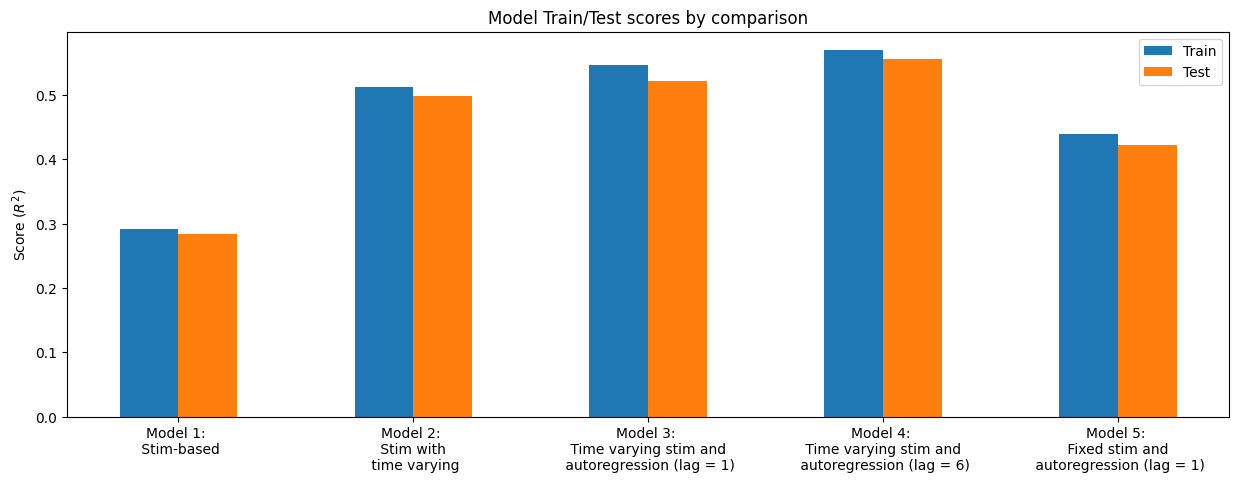

In [455]:
model_scores["Model 5: \n Fixed stim and \n autoregression (lag = 1)"] = (train_score, test_score)
plot_model_scores(model_scores)

**Note** This is performing better than Model 1, the fixed stimulus model

## Visualize against stim-averaged activity:
Is the new autoregressive model able to capture stimulus-averaged activity?

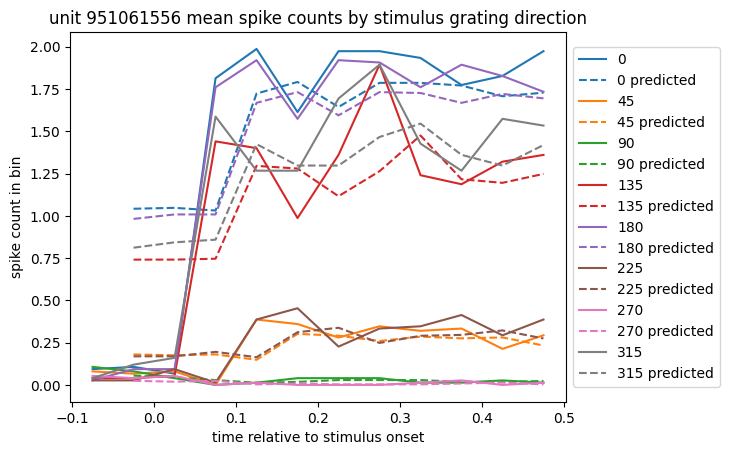

In [456]:
plot_averaged_auto_regressive_predictions(
    spikes=spikes,
    models=[reg],
    unique_orientations=unique_orientations,
    get_X_func=get_X_auto_reg,
    lag=1
)

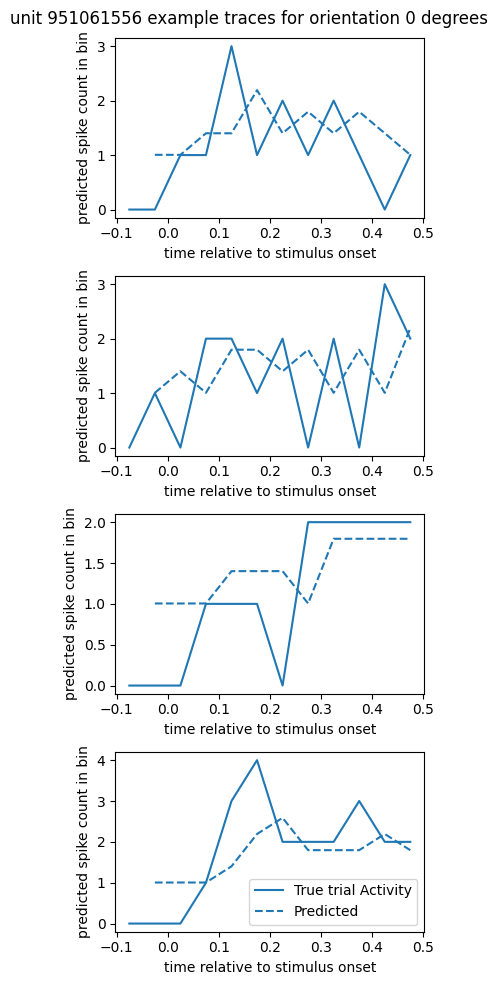

In [457]:
plot_example_trial_results(
    spikes=spikes, 
    models=[reg], 
    orientation=0, 
    n_examples=4,
    get_X_func=get_X_auto_reg
)

### Observation: 
the model shared weights performs similarly well with time-varying weight models

## Using longer history (varying lag)

In [458]:
auto_reg_fixed_weights_fits = []
train_scores = []
test_scores = []

for T in range(1, 10):
    print(f'fitting model of lag {T}')
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    auto_reg_fits = []
    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= T:
            X_train_i = get_X_auto_reg(spikes_train, orientations_train, i, T)
            X_test_i = get_X_auto_reg(spikes_test, orientations_test, i, T)
            Y_train_i = spikes_train[:, i]
            Y_test_i = spikes_test[:, i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, T+8)
    X_test = np.array(X_test).reshape(-1, T+8)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)
    auto_reg_fixed_weights_fits.append(reg)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    # evaluate bin index [T: )
    train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
    test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))
    train_scores.append(train_score)
    test_scores.append(test_score)

fitting model of lag 1
fitting model of lag 2
fitting model of lag 3
fitting model of lag 4
fitting model of lag 5
fitting model of lag 6
fitting model of lag 7
fitting model of lag 8
fitting model of lag 9


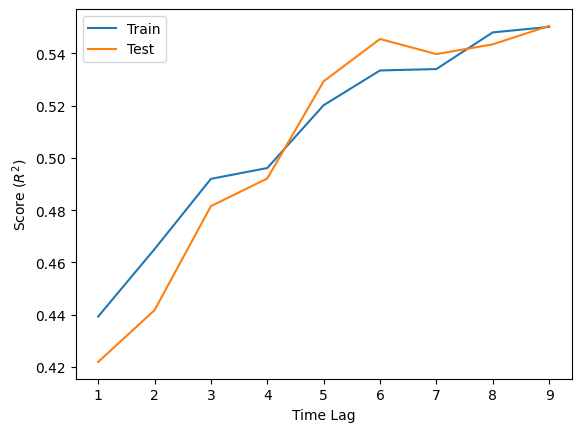

In [459]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), train_scores, label="Train")
ax.plot(range(1, 10), test_scores, label="Test")
ax.set_xlabel("Time Lag")
ax.set_ylabel("Score ($R^2$)")
ax.legend()

## Visualize stimulus averaged conditions with lag = 3

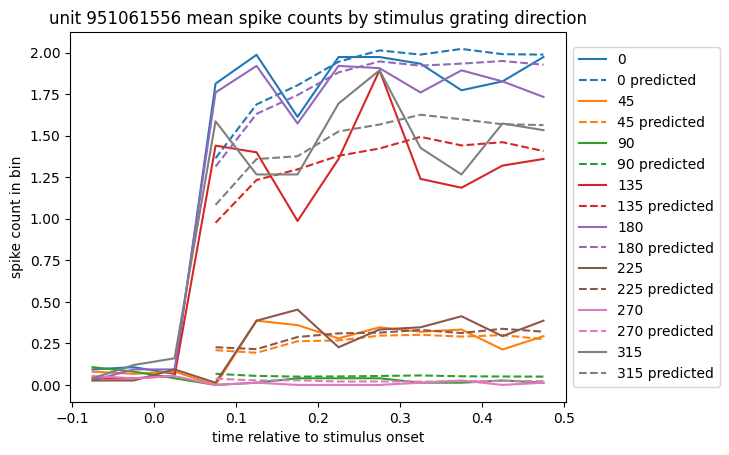

In [460]:
plot_averaged_auto_regressive_predictions(
    spikes=spikes,
    models=[auto_reg_fixed_weights_fits[2]],
    unique_orientations=unique_orientations,
    get_X_func=get_X_auto_reg,
    lag=3
)

## check regression coefficients

In [461]:
model_lag = 1
reg_model = auto_reg_fixed_weights_fits[model_lag-1]
print(f'lag-{model_lag} model coefficients')
print(f' {reg_model.coef_[0, 8:]}')

model_lag = 5
reg_model = auto_reg_fixed_weights_fits[model_lag-1]
auto_coefs = reg_model.coef_[0, 8:]
print(f'lag-{model_lag} model coefficients')
print(auto_coefs)

lag-1 model coefficients
 [0.39592293]
lag-5 model coefficients
[0.00356959 0.10620288 0.12492351 0.11305204 0.17951329]


Let's plot the lag-5 model coefficients. Here, the higher the lag, the further back we look, so we'll plot this in the opposite direction.  

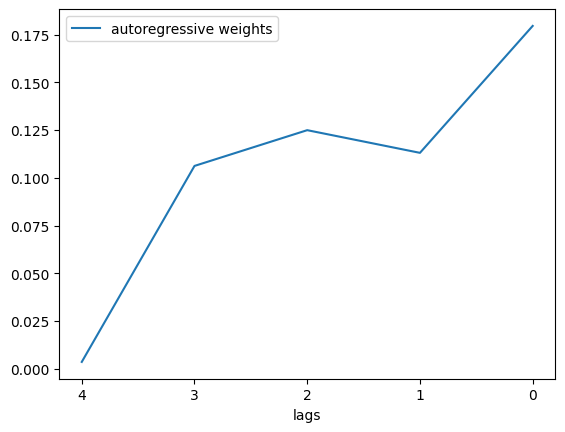

In [462]:
fig, ax = plt.subplots()
ax.plot(auto_coefs, label="autoregressive weights")
ax.set_xticks(np.arange(5))
ax.set_xticklabels(np.arange(5)[::-1])
ax.set_xlabel("lags")
ax.legend()

# How can we examine the interaction among units and how it might contribute to neural dynamics?
Thus far, each neuron has been modeled entirely separately from each other. However, it's known that neurons are highly inter-connected and bound to influence each other. Given this, by modeling the interactions between neurons, we might be able to: 
1. Improve predictive performance of our model
2. Learn and predict interactions between units

## Model 6: model incorporating neuron-to-neuron interaction

$$ r_{i,t} = \textbf{w}^\text{stim} \cdot \textbf{s} + \sum_{j=1}^{N_{units}} w^\text{inter}_{ij} r_{j, t-1}$$
NOTE: add description of terms

### Discussion: 
What are the limitations of this model? What do insights do we gain?

In [463]:
# use a subset of V1 neurons for prediction
interesting_units = [
    951061556,
    951061574,
    951061715,
    951061906,
    951061918,
    951061957
]
target_unit_id = 951061556

presentations.index.values
random_state = 42 # ensure each run has the same split
train_idxs, test_idxs = train_test_split(presentations.index.values, test_size=0.2, random_state=random_state)
spikes_interesting = spikes.loc[:, :, interesting_units]
orientations_train = presentations.orientation.loc[train_idxs].values
spikes_train = spikes_interesting.loc[train_idxs, :, :].values

orientations_test = presentations.orientation.loc[test_idxs].values
spikes_test = spikes_interesting.loc[test_idxs, :, :].values

## stimulus + 1 time bin back

In [464]:
def get_X_auto_reg_population(spikes, orientations, i, lag=1):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    orientations_one_hot = get_one_hot_encoding(orientations) 
    return np.hstack([orientations_one_hot, spikes[:, i-1, :]])

X_train, Y_train = [], []
X_test, Y_test = [], []

Y_train_preds = []
Y_test_preds = []

for i in range(spikes_train.shape[1]):
    if i >= 1:
        X_train_i = get_X_auto_reg_population(spikes_train, orientations_train, i)
        X_test_i = get_X_auto_reg_population(spikes_test, orientations_test, i)
        Y_train_i = spikes_train[:, i, 0]
        Y_test_i = spikes_test[:, i, 0]

        X_train.append(X_train_i)
        X_test.append(X_test_i)
        Y_train.append(Y_train_i)
        Y_test.append(Y_test_i)

X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
Y_train = np.concatenate(Y_train)
Y_test = np.concatenate(Y_test)
print(X_train.shape)
print(Y_train.shape)

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_train_preds.append(reg.predict(X_train))
Y_test_preds.append(reg.predict(X_test))

(5280, 14)
(5280,)


In [465]:
train_score = calc_r_squared(Y_train, np.vstack(Y_train_preds))
test_score = calc_r_squared(Y_test, np.vstack(Y_test_preds))

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.45696853496631595
Test Score: 0.4345471630905091


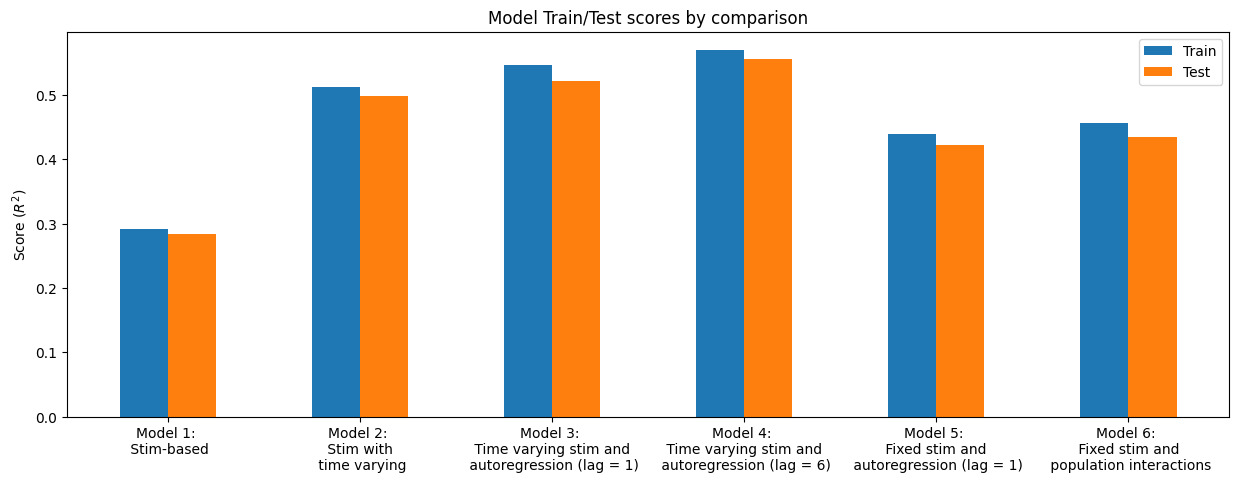

In [466]:
model_scores["Model 6: \n Fixed stim and \n population interactions"] = (train_score, test_score)
plot_model_scores(model_scores)

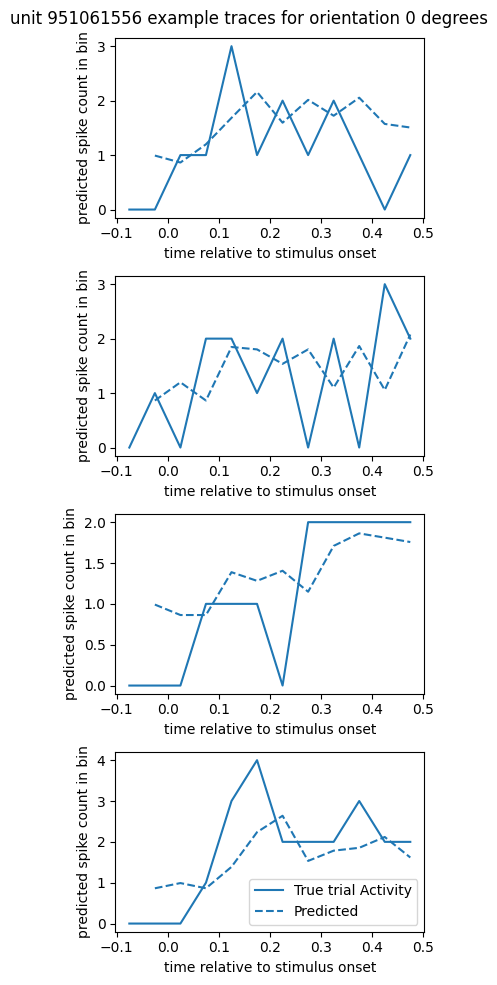

In [467]:
plot_example_trial_results(
    spikes=spikes_interesting,
    models=[reg],
    orientation=0,
    n_examples=4,
    get_X_func=get_X_auto_reg_population,
    lag=1,
    all_spikes_for_reg=True
)

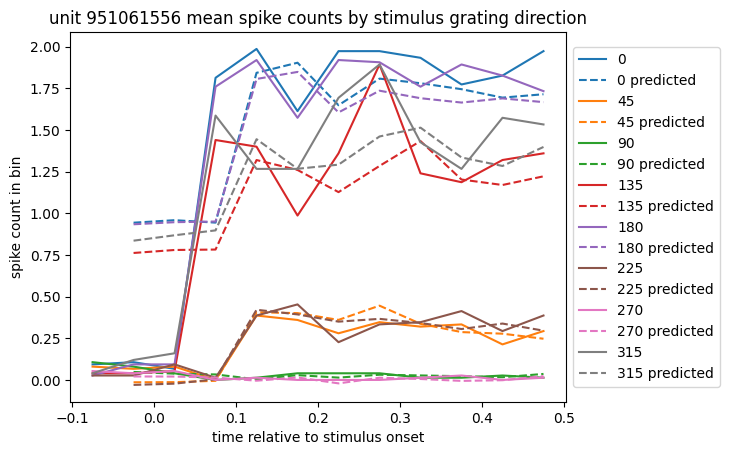

In [468]:
plot_averaged_auto_regressive_predictions(
    spikes=spikes_interesting,
    models=[reg],
    unique_orientations=unique_orientations,
    get_X_func=get_X_auto_reg_population,
    lag=1,
    all_spikes_for_reg=True
)

## check influence from other neurons, $ \mathbf{w}^\text{inter} $

In [469]:
print(f'target_unit: {target_unit_id}')
for i, unit in enumerate(interesting_units):
    print(f' unit {unit} coeff: {reg.coef_[i+8]}')


target_unit: 951061556
 unit 951061556 coeff: 0.33510821060349116
 unit 951061574 coeff: 0.061469879585588354
 unit 951061715 coeff: 0.008212667881073474
 unit 951061906 coeff: 0.12341641818398592
 unit 951061918 coeff: 0.08371892481810492
 unit 951061957 coeff: 0.12813557518304391


Observation: 
- dependence on self previous activity is the strongest (weight 0.335).
- weights are all positive

## Population prediction
We can actually run this prediction for multiple neurons at once

In [470]:
def get_X_auto_reg_population(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    orientations_one_hot = get_one_hot_encoding(orientations)
    return np.concatenate([orientations_one_hot, spikes[:, i-1, :]], axis=1)


X_train_dict, Y_train_dict = {}, {}
X_test_dict, Y_test_dict = {}, {}
reg_dict = {}
Y_train_preds_dict = {}
Y_test_preds_dict = {}


for unit_i, unit in enumerate(interesting_units):
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= 1:
            X_train_i = get_X_auto_reg_population(spikes_train, orientations_train, i)
            X_test_i = get_X_auto_reg_population(spikes_test, orientations_test, i)
            Y_train_i = spikes_train[:, i, unit_i]
            Y_test_i = spikes_test[:, i, unit_i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, len(interesting_units)+8)
    X_test = np.array(X_test).reshape(-1, len(interesting_units)+8)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    X_train_dict[unit] = X_train
    Y_train_dict[unit] = Y_train
    X_test_dict[unit] = X_test
    Y_test_dict[unit] = Y_test
    reg_dict[unit] = reg
    Y_train_preds_dict[unit] = Y_train_preds
    Y_test_preds_dict[unit] = Y_test_preds


In [471]:
for unit in interesting_units:
    print(f'target_unit: {unit}')
    for i, unit_coeff in enumerate(interesting_units):
        print(f' unit {unit_coeff} coeff: {reg_dict[unit].coef_[0, i+8]}')

target_unit: 951061556
 unit 951061556 coeff: 0.33510821060349116
 unit 951061574 coeff: 0.061469879585588354
 unit 951061715 coeff: 0.008212667881073474
 unit 951061906 coeff: 0.12341641818398592
 unit 951061918 coeff: 0.08371892481810492
 unit 951061957 coeff: 0.12813557518304391
target_unit: 951061574
 unit 951061556 coeff: 0.04826606385567053
 unit 951061574 coeff: 0.18895898858862645
 unit 951061715 coeff: 0.015771535322011702
 unit 951061906 coeff: -0.014037424777270763
 unit 951061918 coeff: 0.07491181130256441
 unit 951061957 coeff: 0.18245950562035723
target_unit: 951061715
 unit 951061556 coeff: 0.035257249526316016
 unit 951061574 coeff: -0.012856215314024649
 unit 951061715 coeff: 0.16548122153167535
 unit 951061906 coeff: 0.13898117522657719
 unit 951061918 coeff: 0.015597677822048408
 unit 951061957 coeff: 0.002946627476033935
target_unit: 951061906
 unit 951061556 coeff: 0.02565448246980619
 unit 951061574 coeff: 0.009644547965036096
 unit 951061715 coeff: 0.015335028531

target_unit: 951061556
target_unit: 951061574
target_unit: 951061715
target_unit: 951061906
target_unit: 951061918
target_unit: 951061957


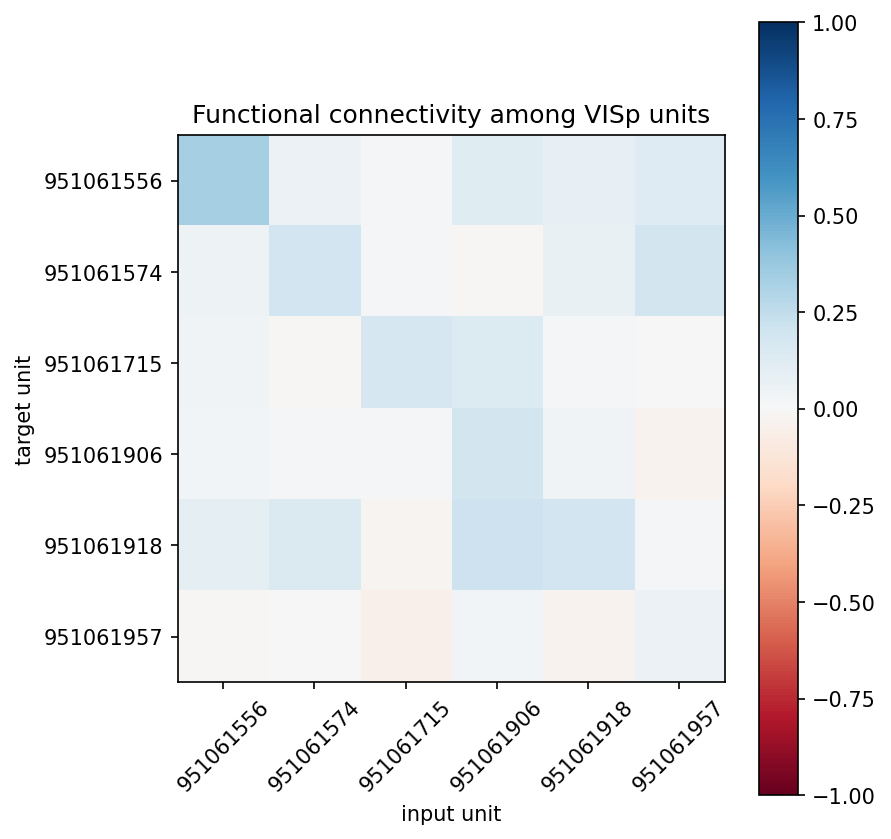

In [472]:
# get functional connectivity matrix
func_conn = []
for unit in interesting_units:
    print(f'target_unit: {unit}')
    func_conn.append(reg_dict[unit].coef_[0, 8:])
func_conn = np.array(func_conn)


fig, ax = plt.subplots(figsize=(6,6), dpi=150)
im = ax.imshow(func_conn, cmap='RdBu', vmin=-1, vmax=1)
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(interesting_units)))
ax.set_xticklabels(interesting_units, rotation=45)
ax.set_yticks(np.arange(len(interesting_units)))
ax.set_yticklabels(interesting_units)
ax.set_xlabel('input unit')
ax.set_ylabel('target unit')
ax.set_title("Functional connectivity among VISp units")
fig.colorbar(im, ax=ax)
fig.tight_layout()

Observation: 
- diagonal elements are strongly positive, indicating self recurrent effect. 
- unit 951061715 might be an inhibitory unit as its effect on most other units are negative.

## with other brain regions
we can include units from other regions to examine potential interactions among different brain regions.
Here let's use units from the primary visual cortex (VISp) and its upstream area, the lateral geniculate nuclues (LGd), as an example to examine how interaction among units from different brain regions might contibute to neural activity patterns.

In [473]:
units_LGd = session.units[session.units["ecephys_structure_acronym"] == 'LGd']
unit_id_LGd = units_LGd.index.to_list()

histograms_LGd = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=unit_id_LGd
)

In [474]:
# using the list of interesting units predetermined by looking data/patrick_scratch/unit_frs_analysis figures
spikes_train_with_LGd = np.concatenate([spikes.loc[train_idxs, :, interesting_units].values,
                                        histograms_LGd.loc[train_idxs, :, unit_id_LGd].values], axis=2)

spikes_test_with_LGd = np.concatenate([spikes.loc[test_idxs, :, interesting_units].values,
                                       histograms_LGd.loc[test_idxs, :, unit_id_LGd].values], axis=2)

In [475]:
def get_X_auto_reg_population(spikes, orientations, i):
    """
    Generates a input data matrix for the 1 time bin auto regressive model
    Args:
        spikes: data array of num_trials x time steps x num_units
        orientations: data array of num_trials
        i: index of time bin
    """
    orientations_one_hot = get_one_hot_encoding(orientations)
    return np.concatenate([orientations_one_hot, spikes[:, i-1, :]], axis=1)


X_train_dict, Y_train_dict = {}, {}
X_test_dict, Y_test_dict = {}, {}
reg_dict = {}
Y_train_preds_dict = {}
Y_test_preds_dict = {}

total_unit = interesting_units+unit_id_LGd

for unit_i, unit in enumerate(total_unit):
    X_train, Y_train = [], []
    X_test, Y_test = [], []

    Y_train_preds = []
    Y_test_preds = []

    for i in range(spikes_train.shape[1]):
        if i >= 1:
            X_train_i = get_X_auto_reg_population(spikes_train_with_LGd, orientations_train, i)
            X_test_i = get_X_auto_reg_population(spikes_test_with_LGd, orientations_test, i)
            Y_train_i = spikes_train_with_LGd[:, i, unit_i]
            Y_test_i = spikes_test_with_LGd[:, i, unit_i]

            X_train.append(X_train_i)
            X_test.append(X_test_i)
            Y_train.append(Y_train_i)
            Y_test.append(Y_test_i)

    X_train = np.array(X_train).reshape(-1, len(total_unit)+8)
    X_test = np.array(X_test).reshape(-1, len(total_unit)+8)
    Y_train = np.array(Y_train).reshape(-1, 1)
    Y_test = np.array(Y_test).reshape(-1, 1)

    reg = LinearRegression()
    reg.fit(X_train, Y_train)

    Y_train_preds.append(reg.predict(X_train))
    Y_test_preds.append(reg.predict(X_test))

    X_train_dict[unit] = X_train
    Y_train_dict[unit] = Y_train
    X_test_dict[unit] = X_test
    Y_test_dict[unit] = Y_test
    reg_dict[unit] = reg
    Y_train_preds_dict[unit] = Y_train_preds
    Y_test_preds_dict[unit] = Y_test_preds


target_unit: 951061556
target_unit: 951061574
target_unit: 951061715
target_unit: 951061906
target_unit: 951061918
target_unit: 951061957
target_unit: 951060149
target_unit: 951060126
target_unit: 951060091
target_unit: 951060134
target_unit: 951060162
target_unit: 951060157
target_unit: 951060187
target_unit: 951060191


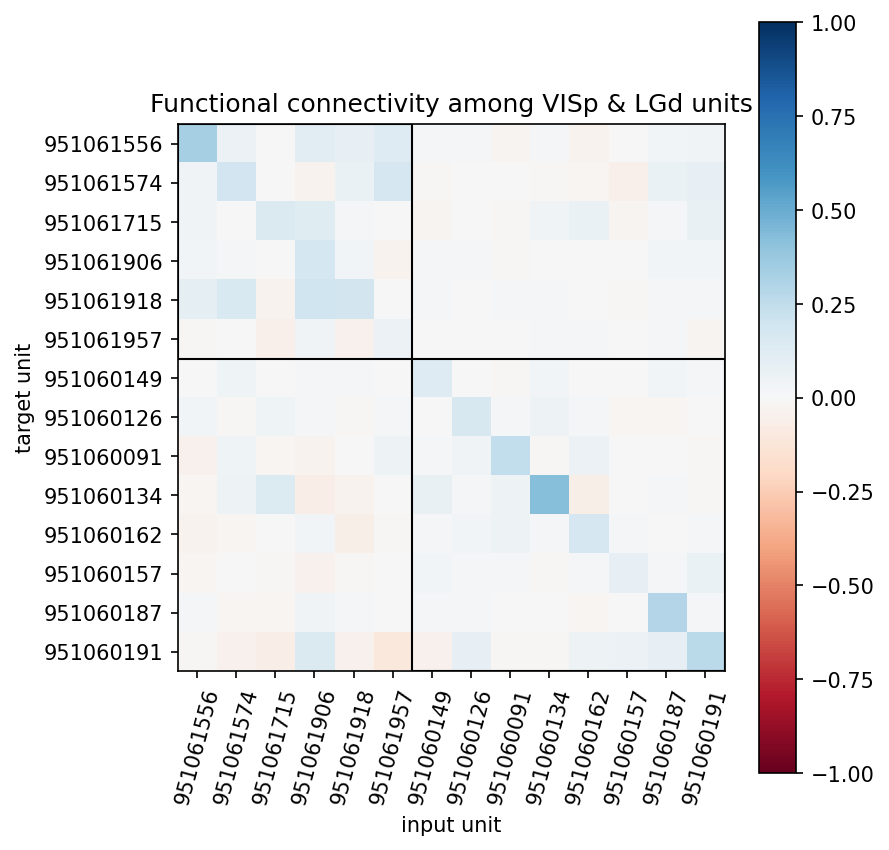

In [476]:
# get functional connectivity matrix
func_conn = []
for unit in total_unit:
    print(f'target_unit: {unit}')
    func_conn.append(reg_dict[unit].coef_[0, 8:])
func_conn = np.array(func_conn)

from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6,6), dpi=150)
im = ax.imshow(func_conn, cmap='RdBu', vmin=-1, vmax=1)
ax.add_patch(Rectangle((-0.5, -0.5), len(interesting_units), len(interesting_units), 
             edgecolor='black', facecolor='red', fill=False, lw=1))
ax.add_patch(Rectangle((-0.5+len(interesting_units), -0.5+len(interesting_units)), 
                    len(unit_id_LGd), len(unit_id_LGd), 
             edgecolor='black', facecolor='red', fill=False, lw=1))

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(total_unit)))
ax.set_xticklabels(total_unit, rotation=75)
ax.set_yticks(np.arange(len(total_unit)))
ax.set_yticklabels(total_unit)
ax.set_xlabel('input unit')
ax.set_ylabel('target unit')
ax.set_title("Functional connectivity among VISp & LGd units")
fig.colorbar(im, ax=ax)
fig.tight_layout()

### Observation
- Again, digonal elements indicate strong autocorrelation of neural activity
- in general the weights from VISp to LGd is more negative (the lower left quadrant), perhaps indicating the top-down feedback inhibition from VISp to LGd?

# Problem Sets

1. Use orientation value directly instead of the one-hot encoding
2. Consider nonlinear relationships between responses and features: $r_t = f(x)$ where $f$ is a nonlinear function. Examples could be: regression with sine/ cosine function of orientation value, polynomials bases, or parametrized nonlinear function (Von Mises). 
3. Consider non-Gaussian noise / non-MSE loss (this actually corresponds to a Generalized Linear Model (GLM))
4. Try modeling even more neurons per area, in more areas. You may run into issues with a large parameter space. Consider applying dimensionality reduction techniques to reduce the neuron space into something smaller. 
5. Implement full-fledged recurrent neural network models. What do you think would be a good network architecture choice? Why? How could you verify?
6. We have only been using one-step prediction evaluation of models (using true previous activities as regressors). What are some limitations? Hint: consider multi-step predictions

# Extra material

### Re-run linear regression with sine/cosine features

In [79]:
def get_sines_cosines_from_orientations(orientations):
    """
    Takes in orientations as degrees
    returns sines and cosines as np array of dims data_points x 2
    """
    radians = orientations.astype(float) * np.pi / 180
    sines = np.sin(radians)
    cosines = np.cos(radians)
    return np.vstack([cosines, sines]).T


In [40]:
sines = np.sin(radians)
cosines = np.cos(radians)
X = np.vstack([cosines, sines]).T

In [46]:
sin_cos_results = []
for i in range(spikes.shape[1]):
    reg = LinearRegression()
    X = get_sines_cosines_from_orientations(orientations)
    Y = spikes[:, i]
    reg.fit(X, Y)
    sin_cos_results.append(reg)

Text(0.5, 1.0, 'unit 951061556 predicted spike counts by stimulus grating direction')

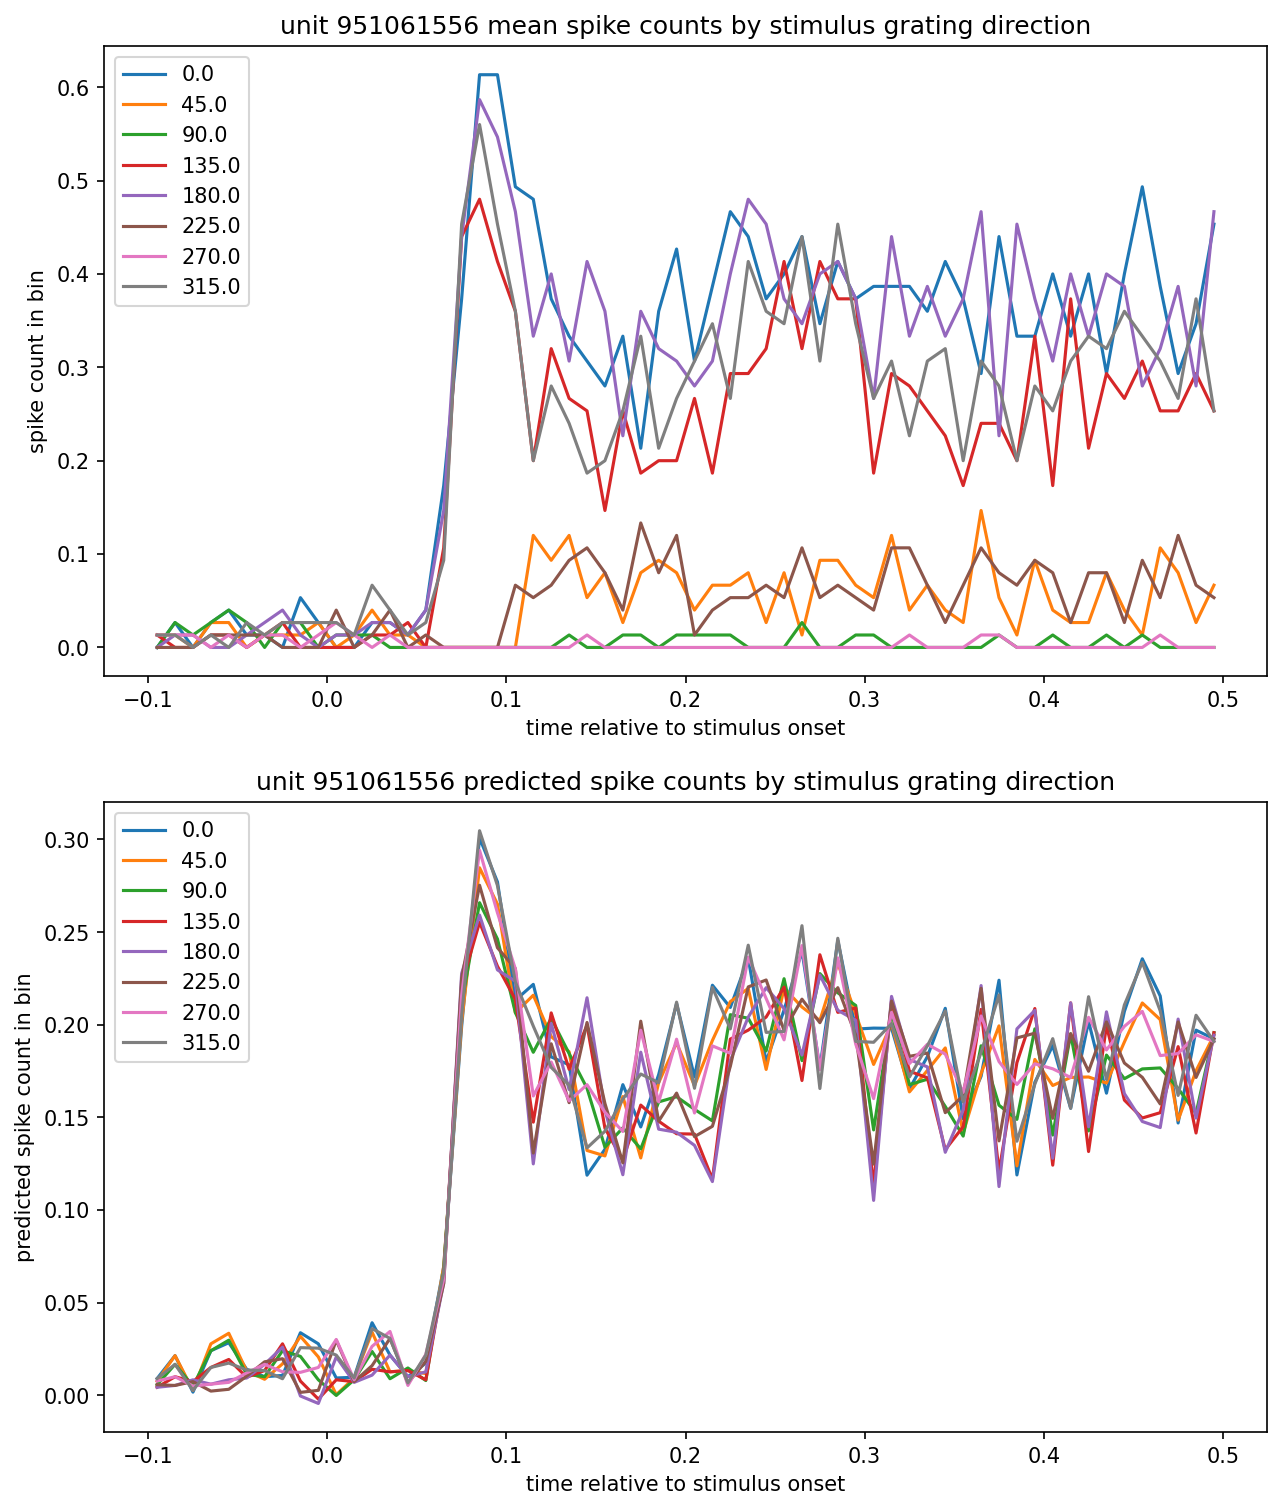

In [47]:
# plot regression result
unique_orientations.sort()

fig, ax = plt.subplots(2, 1, figsize=(10, 12), dpi=150)

unit_id = 951061556
for orientation in unique_orientations: 
    trial_ids = presentations[presentations.orientation == orientation].index.values        
    data = spikes.loc[trial_ids, :, unit_id]
    mean = data.mean(dim="stimulus_presentation_id")
    ax[0].plot(data["time_relative_to_stimulus_onset"], mean, label=orientation)
ax[0].legend()
ax[0].set_xlabel("time relative to stimulus onset")
ax[0].set_ylabel("spike count in bin")
ax[0].set_title(f"unit {unit_id} mean spike counts by stimulus grating direction")


pred_responses = []
for res in sin_cos_results:
    pred_responses.append(res.predict(get_sines_cosines_from_orientations(unique_orientations)))
pred_responses = np.array(pred_responses)

for i, orientation in enumerate(unique_orientations):
    ax[1].plot(data["time_relative_to_stimulus_onset"], pred_responses[:, i], label=orientation)
ax[1].legend()
ax[1].set_xlabel("time relative to stimulus onset")
ax[1].set_ylabel("predicted spike count in bin")
ax[1].set_title(f"unit {unit_id} predicted spike counts by stimulus grating direction")